# Latar Belakang
Bangkok adalah salah satu destinasi wisata paling populer di dunia, dengan permintaan akomodasi yang terus meningkat. Airbnb memberikan alternatif penginapan yang fleksibel bagi wisatawan, sekaligus peluang bisnis bagi pemilik properti. Namun, ketidakpastian pasar seperti perubahan regulasi dan fluktuasi wisatawan dapat memengaruhi okupansi dan pendapatan host.

## Pernyataan Masalah
Meskipun Airbnb di Bangkok memiliki potensi besar, host menghadapi risiko potential lost akibat ketidakpastian pasar, seperti perubahan regulasi, penurunan jumlah wisatawan, dan strategi harga yang kurang optimal. Beberapa host mengalami okupansi rendah karena faktor seperti minimum stay yang terlalu panjang, kurangnya ulasan, atau ketersediaan listing yang terbatas. Jika tidak dikelola dengan baik, hal ini dapat berdampak pada penurunan return on investment (ROI) dan keberlanjutan bisnis mereka.

## 1. Import Data

In [4474]:
import pandas as pd
import numpy as np
import folium
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point
from IPython.display import display
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini memiliki 15.854 entri dan 17 kolom. Berikut adalah beberapa kolom penting yang bisa digunakan untuk analisis :

* `name` : Nama listing Airbnb.
* `host_id & host_name` : Informasi tentang pemilik listing.
* `neighbourhood` : Lokasi listing berdasarkan distrik atau area di Bangkok.
* `latitude & longitude` : Koordinat geografis.
* `room_type` : Jenis akomodasi (Entire home/apt, Private room, dll.).
* `price` : Harga per malam dalam mata uang tertentu (kemungkinan Baht Thailand).
* `minimum_nights` : Minimal jumlah malam yang harus dipesan.
* `number_of_reviews` : Total ulasan yang diterima setiap listing.
* `last_review` : Tanggal ulasan terakhir.
* `reviews_per_month` : Rata-rata jumlah ulasan per bulan.
* `calculated_host_listings_count` : Jumlah listing yang dimiliki oleh satu host.
* `availability_365` : Ketersediaan listing dalam setahun (berapa hari bisa dipesan).
* `number_of_reviews_ltm` : Jumlah ulasan dalam 12 bulan terakhir.

Berikut 5 baris teratas dan terbawah dari dataset Airbnb Listings Bangkok

In [4475]:
df = pd.read_csv("Airbnb Listings Bangkok.csv")
display(df.head(),df.tail())

id                                            name  host_id  \
0  0   27934                 Nice room with superb city view   120437   
1  1   27979                  Easy going landlord,easy place   120541   
2  2   28745               modern-style apartment in Bangkok   123784   
3  3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   
4  4  941865                      Suite Room 3 at MetroPoint   610315   

    host_name neighbourhood  latitude  longitude        room_type  price  \
0      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   1905   
1         Emy       Bang Na  13.66818  100.61674     Private room   1316   
2  Familyroom     Bang Kapi  13.75232  100.62402     Private room    800   
3     Sirilak     Din Daeng  13.78823  100.57256     Private room   1286   
4       Kasem     Bang Kapi  13.76872  100.63338     Private room   1905   

   minimum_nights  number_of_reviews  last_review  reviews_per_month  \
0               3                 65  2020-0 1-06               0.50   
1               1                  0          NaN                NaN   
2              60                  0          NaN                NaN   
3               7                  2   04/01/2022               0.03   
4               1                  0          NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

id  \
15849  15849  790465040741092826   
15850  15850  790474503157243541   
15851  15851  790475335086864240   
15852  15852  790475546213717328   
15853  15853  790476492384199044   

                                                     name    host_id  \
15849       素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   94899359   
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea  491526222   
15851   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15852   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15853   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   

       host_name neighbourhood   latitude   longitude     room_type  price  \
15849      Renee       Pra Wet  13.715132  100.653458  Private room   2298   
15850  Phakhamon   Ratchathewi  13.753052  100.538738  Private room   1429   
15851  Phakhamon   Ratchathewi  13.753169  100.538700  Private room   1214   
15852  Phakhamon   Ratchathewi  13.754789  100.538757  Private room   1214   
15853  Phakhamon   Ratchathewi  13.752960  100.540820  Private room   1214   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
15849              28                  0         NaN                NaN   
15850               1                  0         NaN                NaN   
15851               1                  0         NaN                NaN   
15852               1                  0         NaN                NaN   
15853               1                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
15849                               1               362                      0  
15850                              14               365                      0  
15851                              14               365                      0  
15852                              14               365                      0  
15853                              14               365                      0

## 2. Data Understanding and Cleaning

In [4476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0                                   15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

### A. Cek Data Duplikat

1. Price
* Alasan tidak dihapus: Banyak listing mungkin memiliki harga yang sama meskipun berasal dari host atau lokasi yang berbeda.

In [4477]:
df.duplicated(subset=['price']).sum()

12814

2. Latitude & Longitude
* Alasan tidak dihapus: Beberapa properti bisa berada di lokasi yang sama (misalnya apartemen dalam satu gedung).

In [4478]:
df.duplicated(subset=['latitude']).sum()

6248

In [4479]:
df.duplicated(subset=['longitude']).sum()

5631

3. Host ID
* Alasan tidak dihapus: 
    * Satu host bisa memiliki banyak properti yang berbeda.
    * Jika dihapus, bisa menghilangkan data valid tentang listing yang dikelola oleh host yang sama.

In [4480]:
df.duplicated(subset=['host_id']).sum()

9195

4. Neighbourhood (Wilayah)
* Alasan tidak dihapus:
    * Banyak listing berada di satu wilayah yang sama.
    * Tidak berarti data duplikat, karena properti bisa berbeda dalam satu neighbourhood.

In [4481]:
df.duplicated(subset=['neighbourhood']).sum()

15804

### B. Cek Unique Value

In [4482]:
# data unik di tiap kolom
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0                                              15854   
1                               id             15854   
2                             name             14794   
3                          host_id              6659   
4                        host_name              5312   
5                    neighbourhood                50   
6                         latitude              9606   
7                        longitude             10223   
8                        room_type                 4   
9                            price              3040   
10                  minimum_nights                86   
11               number_of_reviews               298   
12                     last_review              1670   
13               reviews_per_month               513   
14  calculated_host_listings_count                50   
15                availability_365               366   
16           number_of_reviews_ltm                85   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Secara umum, kita bisa melihat bahwa:

* Dataset Airbnb Listings Bangkok memiliki 15,854 baris dengan berbagai informasi terkait listing properti.
* Kolom `id` berisi 15,854 ID unik, yang merepresentasikan setiap listing secara individual.
* Kolom `name` memiliki 14,794 nilai unik, yang menunjukkan bahwa beberapa listing mungkin memiliki nama yang sama atau mirip.
* Kolom `host_id` menunjukkan bahwa terdapat 6,659 host unik, yang berarti beberapa host memiliki lebih dari satu listing.
* Kolom `host_name` memiliki 5,312 nama unik, yang bisa jadi disebabkan oleh beberapa host menggunakan nama yang sama atau akun bersama.

### C. Missing Value

In [4483]:
# Persentase Missing Value
# df_clean = df.copy()

missing_percentage = (df.isna().sum() / df.shape[0]) * 100
print(missing_percentage.round(2).astype(str) + '%')

                                    0.0%
id                                  0.0%
name                               0.05%
host_id                             0.0%
host_name                          0.01%
neighbourhood                       0.0%
latitude                            0.0%
longitude                           0.0%
room_type                           0.0%
price                               0.0%
minimum_nights                      0.0%
number_of_reviews                   0.0%
last_review                       36.52%
reviews_per_month                 36.52%
calculated_host_listings_count      0.0%
availability_365                    0.0%
number_of_reviews_ltm               0.0%
dtype: object


Data yang kosong/null di kolom last_review dan reviews_per_month bernilai sama besar yakni 36.52%, data ini tidak akan dihapus karena cukup signifikan pengaruhnya terhadap analisis

<Axes: >

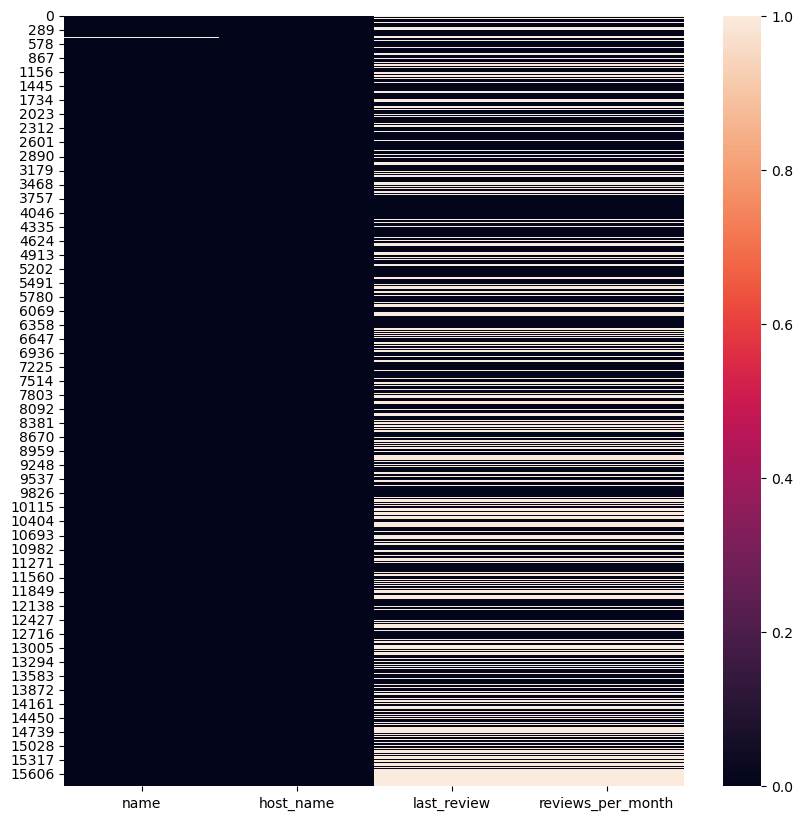

In [4484]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna())

Kita sudah melihat persebaran missing values di 2 kolom review, masing masing memiliki baris kosong/null yang saling berkolerasi maka dari itu akan dilakukan pendekatan untuk mengisi baris-baris yang kosong. 
#### `last_review` dan `reviews_per_month`

In [4485]:
# jumlah missing value
df[['name','host_name','last_review', 'reviews_per_month']].isna().sum()

name                    8
host_name               1
last_review          5790
reviews_per_month    5790
dtype: int64

In [4486]:
df.dtypes

                                    int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

Tipe data pada review masih object, saya akan mengubah ke datetime karena last review seharusnya berisi tanggal pemberian review terakhir oleh konsumen dan kolom reviews_per_month akan saya ubah ke integer karena penggunaan float untuk analisis akan menghasilkan output yang rancu. 

In [4487]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['last_review'].fillna(1-1-2012, inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df['reviews_per_month'] = df['reviews_per_month'].round().astype(int)
df[['name', 'host_name']] = df[['name', 'host_name']].fillna('Unknown')
df.dtypes

                                    int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                   int32
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [4488]:
df[['name','host_name','last_review', 'reviews_per_month']].isna().sum()

name                 0
host_name            0
last_review          0
reviews_per_month    0
dtype: int64

## 3. Exploratory Data Analysis

Sebelum melakukan EDA, saya akan memisahkan antara variabel Numerik dan Kategorikal untuk memudahkan analisis

In [4489]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
categorical_cols

Categorical Variables:


['name', 'host_name', 'neighbourhood', 'room_type', 'last_review']

In [4490]:
print("Numerical Variables:")
numerical_cols

Numerical Variables:


[' ',
 'id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm']

### A. Statistik Deskriptif

In [4491]:
# Statistik deskriptif untuk kolom kategorikal
desc_categorical = df[categorical_cols].describe()
desc_categorical

name host_name  \
count                                              15854     15854   
unique                                             14795      5313   
top     New!  La Chada Night Market studio 2PPL near MRT     Curry   
freq                                                  45       228   

       neighbourhood        room_type  last_review  
count          15854            15854        15854  
unique            50                4         1670  
top          Vadhana  Entire home/apt        -2012  
freq            2153             8912         5791

In [4492]:
# Statistik deskriptif untuk kolom numerikal
desc_numerical = df[numerical_cols].describe()
desc_numerical

id       host_id      latitude     longitude  \
count  15854.000000  1.585400e+04  1.585400e+04  15854.000000  15854.000000   
mean    7926.500000  1.579397e+17  1.541058e+08     13.745144    100.559903   
std     4576.799919  2.946015e+17  1.318726e+08      0.043040      0.050911   
min        0.000000  2.793400e+04  5.892000e+04     13.527300    100.329550   
25%     3963.250000  2.104509e+07  3.974431e+07     13.720090    100.529690   
50%     7926.500000  3.503734e+07  1.224556e+08     13.738490    100.561415   
75%    11889.750000  5.256154e+07  2.390547e+08     13.759497    100.585150   
max    15853.000000  7.908162e+17  4.926659e+08     13.953540    100.923440   

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  1.585400e+04    15854.000000       15854.000000       15854.000000   
mean   3.217704e+03       15.292355          16.654157           0.482780   
std    2.497212e+04       50.815020          40.613331           0.988127   
min    0.000000e+00        1.000000           0.000000           0.000000   
25%    9.000000e+02        1.000000           0.000000           0.000000   
50%    1.429000e+03        1.000000           2.000000           0.000000   
75%    2.429000e+03        7.000000          13.000000           1.000000   
max    1.100000e+06     1125.000000        1224.000000          19.000000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15854.000000      15854.000000           15854.000000  
mean                        13.889618        244.378643               3.481519  
std                         30.269848        125.843224               8.916937  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

### B. Visualisasi Data

Distribusi `room_type` (Tipe Kamar yang Tersedia)

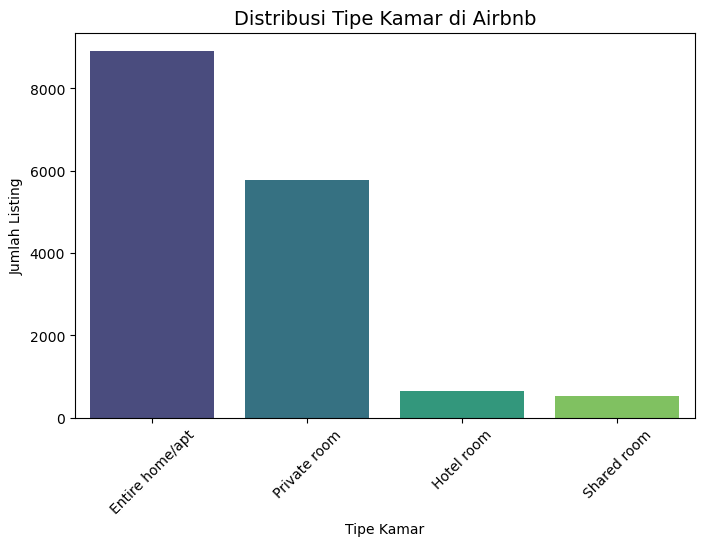

In [4493]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='room_type', palette='viridis', order=df['room_type'].value_counts().index)
plt.title('Distribusi Tipe Kamar di Airbnb', fontsize=14)
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=45)
plt.show()

Hubungan `room_type` dengan `availability_365` (Ketersediaan per Tahun)

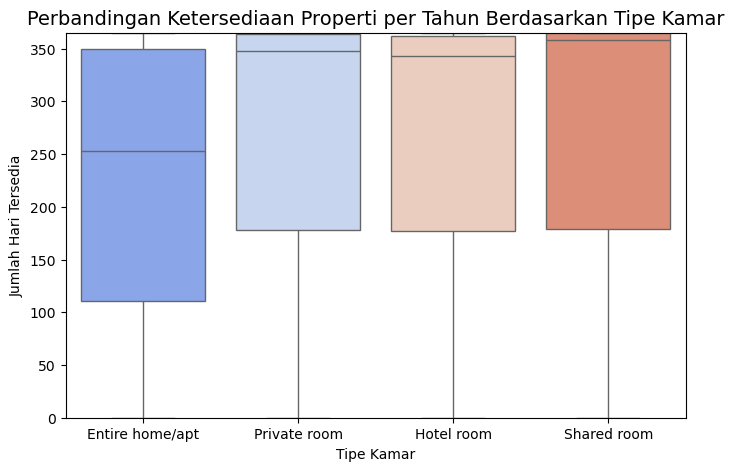

In [4494]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='room_type', y='availability_365', palette='coolwarm')
plt.title('Perbandingan Ketersediaan Properti per Tahun Berdasarkan Tipe Kamar', fontsize=14)
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah Hari Tersedia')
plt.ylim(0, 365)
plt.show()

Distribusi `neighbourhood` (Wilayah Listing)

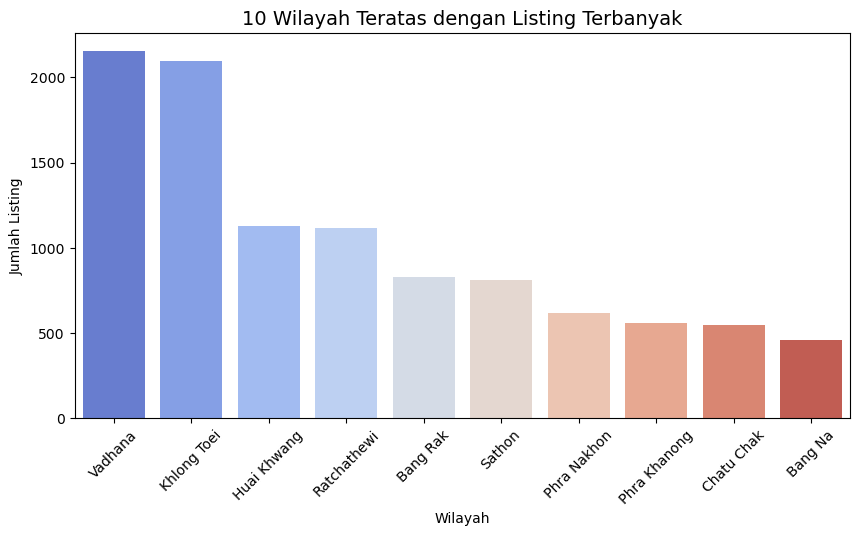

In [4495]:
plt.figure(figsize=(10,5))
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)  # Ambil 10 Wilayah Teratas
sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values, palette='coolwarm')
plt.title('10 Wilayah Teratas dengan Listing Terbanyak', fontsize=14)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=45)
plt.show()

Distribusi Harga `price`

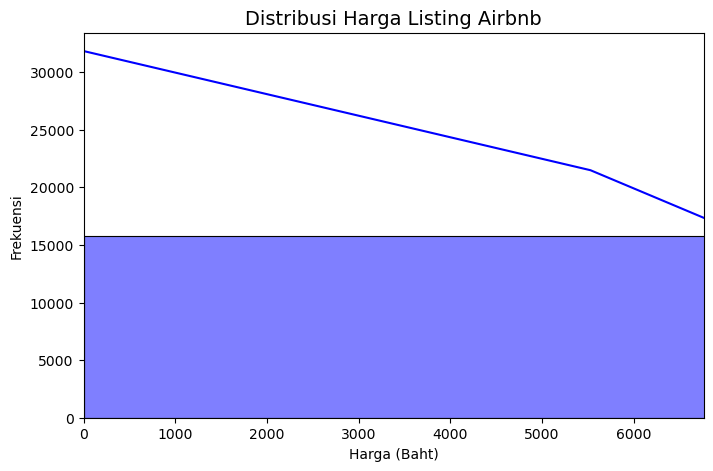

In [4496]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.xlim(0, df['price'].quantile(0.95))  # Batasi agar tidak terlalu panjang
plt.title('Distribusi Harga Listing Airbnb', fontsize=14)
plt.xlabel('Harga (Baht)')
plt.ylabel('Frekuensi')
plt.show()

Distribusi `calculated_host_listings_count` (Jumlah Properti per Host)

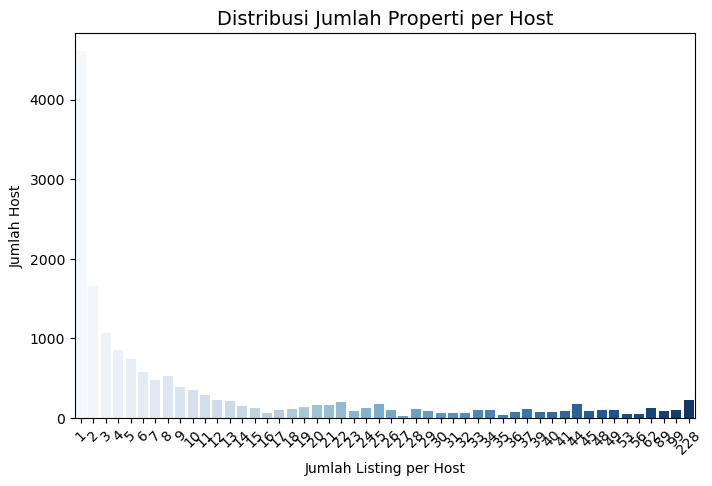

In [4497]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='calculated_host_listings_count', palette='Blues')
plt.title('Distribusi Jumlah Properti per Host', fontsize=14)
plt.xlabel('Jumlah Listing per Host')
plt.ylabel('Jumlah Host')
plt.xticks(rotation=45)
plt.show()

Harga rata-rata listing per `neighbourhood`

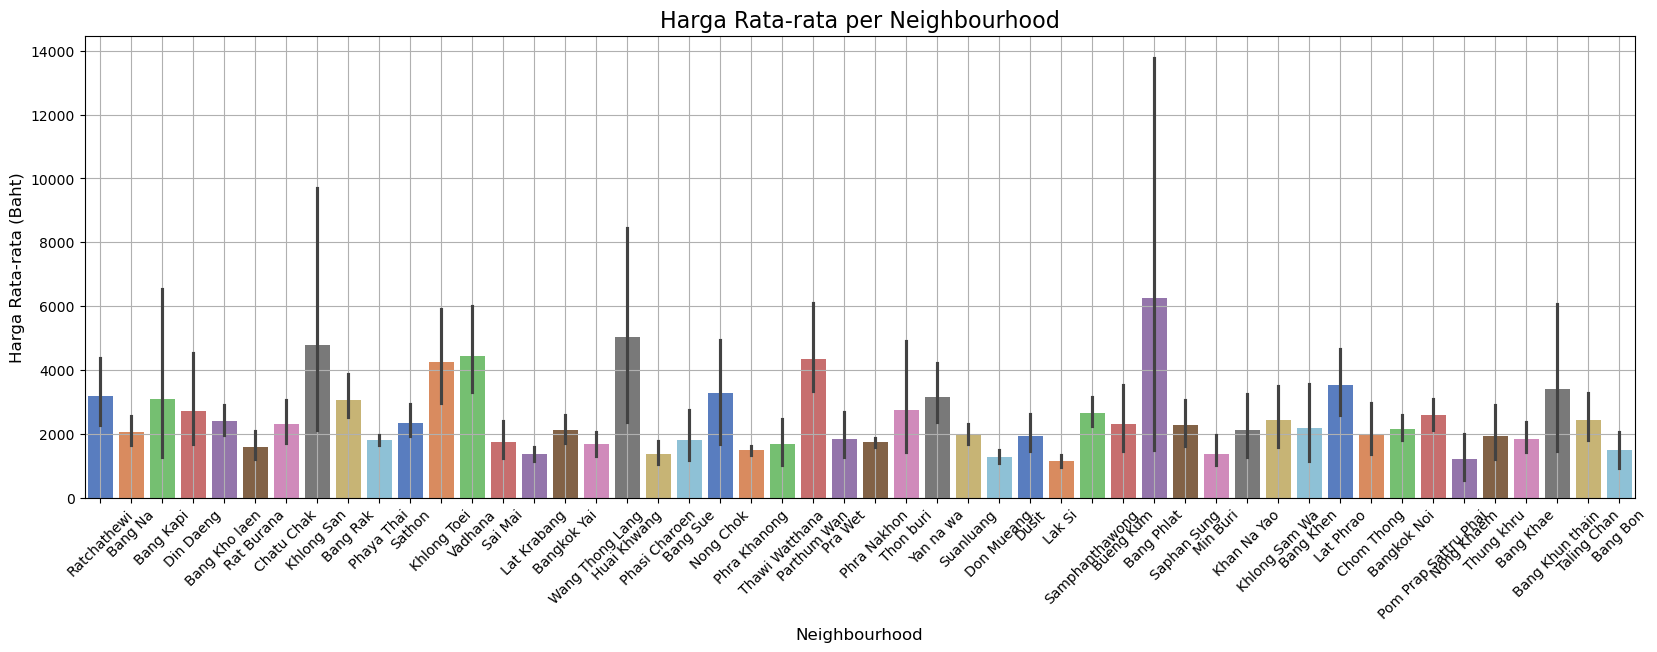

In [4498]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x='neighbourhood', y='price', estimator='mean', palette='muted')
plt.title('Harga Rata-rata per Neighbourhood', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Harga Rata-rata (Baht)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Scatter Plot `latitude` vs `longitude` untuk Lokasi Listing

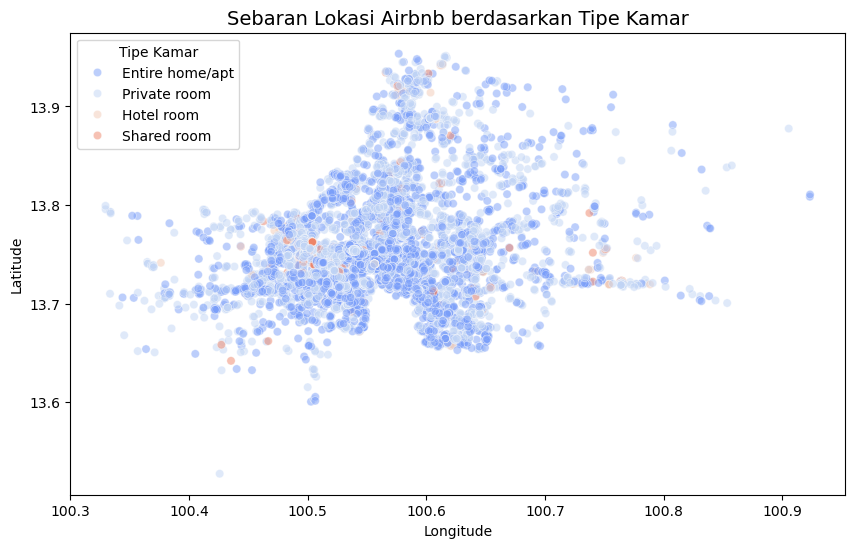

In [4499]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type', alpha=0.5, palette='coolwarm')
plt.title('Sebaran Lokasi Airbnb berdasarkan Tipe Kamar', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Tipe Kamar')
plt.show()

Boxplot Harga `price` berdasarkan `room_type`

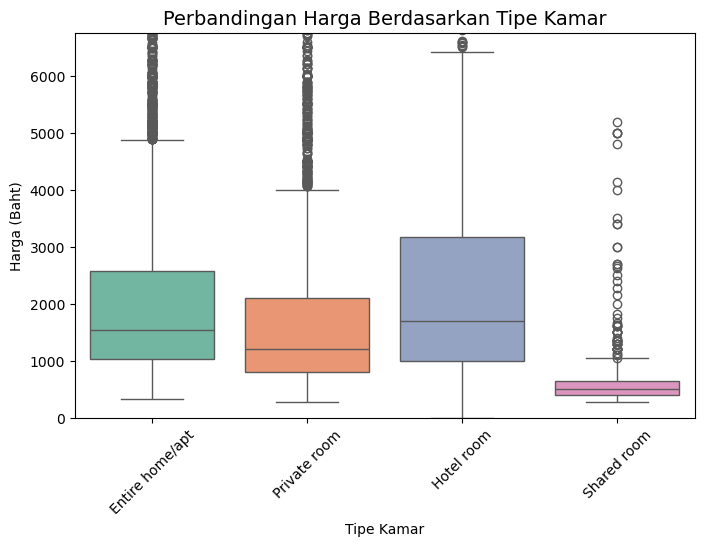

In [4500]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='room_type', y='price', palette='Set2')
plt.ylim(0, df['price'].quantile(0.95))  # Hilangkan outlier ekstrem
plt.title('Perbandingan Harga Berdasarkan Tipe Kamar', fontsize=14)
plt.xlabel('Tipe Kamar')
plt.ylabel('Harga (Baht)')
plt.xticks(rotation=45)
plt.show()

### C. Uji Normalitas Data / Cek Distribusi

In [4501]:
# Hapus kolom kosong pertama jika ada (spasi di awal)
df_clean = df.copy()
if ' ' in df_clean.columns:
    df_clean = df_clean.drop(columns=[' '])

# Drop nilai NaN pada kolom yang relevan
df_clean = df_clean.dropna(subset=['price', 'availability_365', 'reviews_per_month', 'minimum_nights'])

Alasan kenapa hanya visualisasikan 4 kolom numerik utama adalah karena fokus pada distribusi numerik yang relevan secara bisnis dan layak untuk analisis potential lost & insight revenue. Visualisasi ini hanya digunakan sebagai insight karena untuk menganalisa Potential Lost dan memberi rekomendasi tidak perlu distribusi data harus normal.
Distribusi Data:
1. Harga (Price)
   * Sebagian besar listing harga di bawah Rp10 juta (banyak outlier).
   * Distribusi kanan miring (right-skewed), tidak normal.

2. Ketersediaan per Tahun (Availability_365)
   * Banyak listing tersedia 365 hari (maksimal), puncak tajam di ujung kanan.
   * Distribusi multi-puncak (bimodal), tidak normal.

3. Review per Bulan (Reviews_per_month)
   * Sebagian besar listing memiliki review < 2 per bulan.
   * Distribusi kanan miring.

4. Minimum Nights
   * Mayoritas listing punya minimum nights rendah (1–5 malam), beberapa ekstrem (1000+ malam).
   * Distribusi kanan miring ekstrem, banyak outlier.

Kesimpulan Visual:
Seluruh distribusi tidak normal, cenderung miring kanan, dan ada banyak outlier ekstrem di price dan minimum nights.

### Visualisasi Distribusi

1. Persebaran data `price`

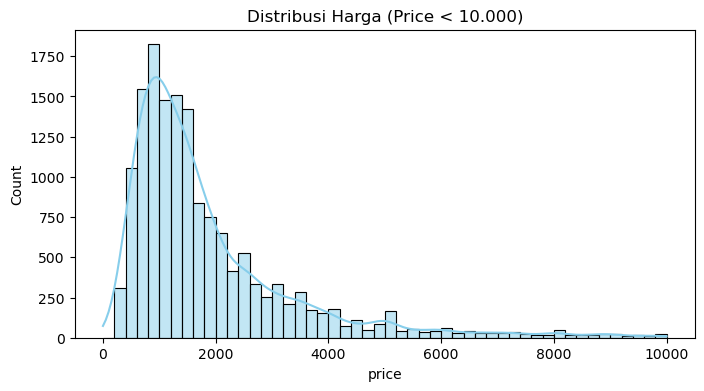

In [4502]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean[df_clean['price'] < 10000]['price'], bins=50, kde=True, color='skyblue')
plt.title("Distribusi Harga (Price < 10.000)")
plt.xlabel("price")
plt.ylabel("Count")
plt.show()

2. Persebaran data `reviews_per_month`

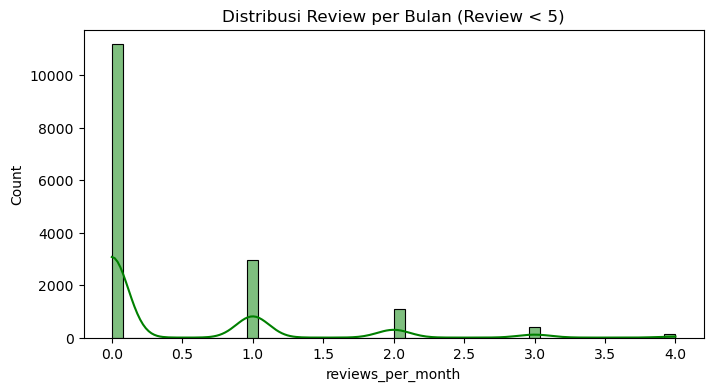

In [4503]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean[df_clean['reviews_per_month'] < 5]['reviews_per_month'], bins=50, kde=True, color='green')
plt.title("Distribusi Review per Bulan (Review < 5)")
plt.xlabel("reviews_per_month")
plt.ylabel("Count")
plt.show()

3. Persebaran data `minimum_nights`

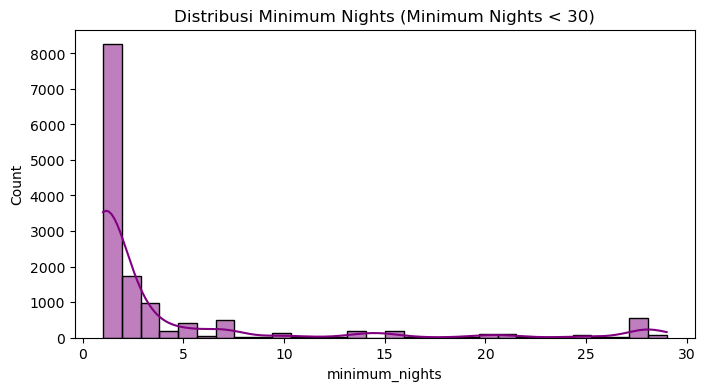

In [4504]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean[df_clean['minimum_nights'] < 30]['minimum_nights'], bins=30, kde=True, color='purple')
plt.title("Distribusi Minimum Nights (Minimum Nights < 30)")
plt.xlabel("minimum_nights")
plt.ylabel("Count")
plt.show()

4. Persebaran data `availability_365`

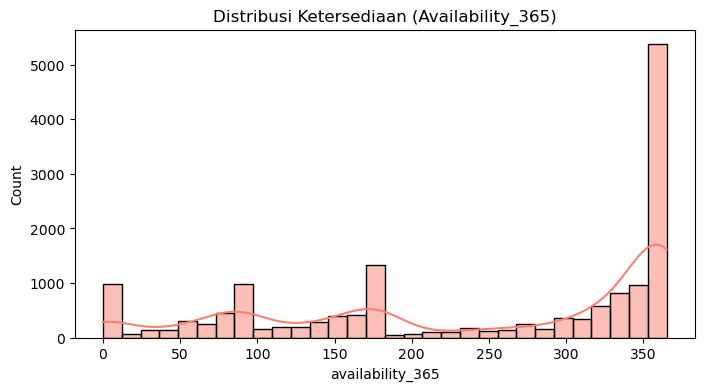

In [4505]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['availability_365'], bins=30, kde=True, color='salmon')
plt.title("Distribusi Ketersediaan (Availability_365)")
plt.xlabel("availability_365")
plt.ylabel("Count")
plt.show()

### D. Cek Outlier

Dari visualisasi distribusi dapat dilihat bahwa `price`, `minimum_nights`,`availability_365`, dan`reviews_per_month` tidak terdistribusi normal. Persebaran data yang tidak normal kemungkinan besar memiliki outlier maka dari itu akan kita cek seberapa banyak outlier nya dan akan dilakukan pembatasan (filtering) pemakaian data berdasarkan kondisi aktual yang dapat menyebabkan potential lost.

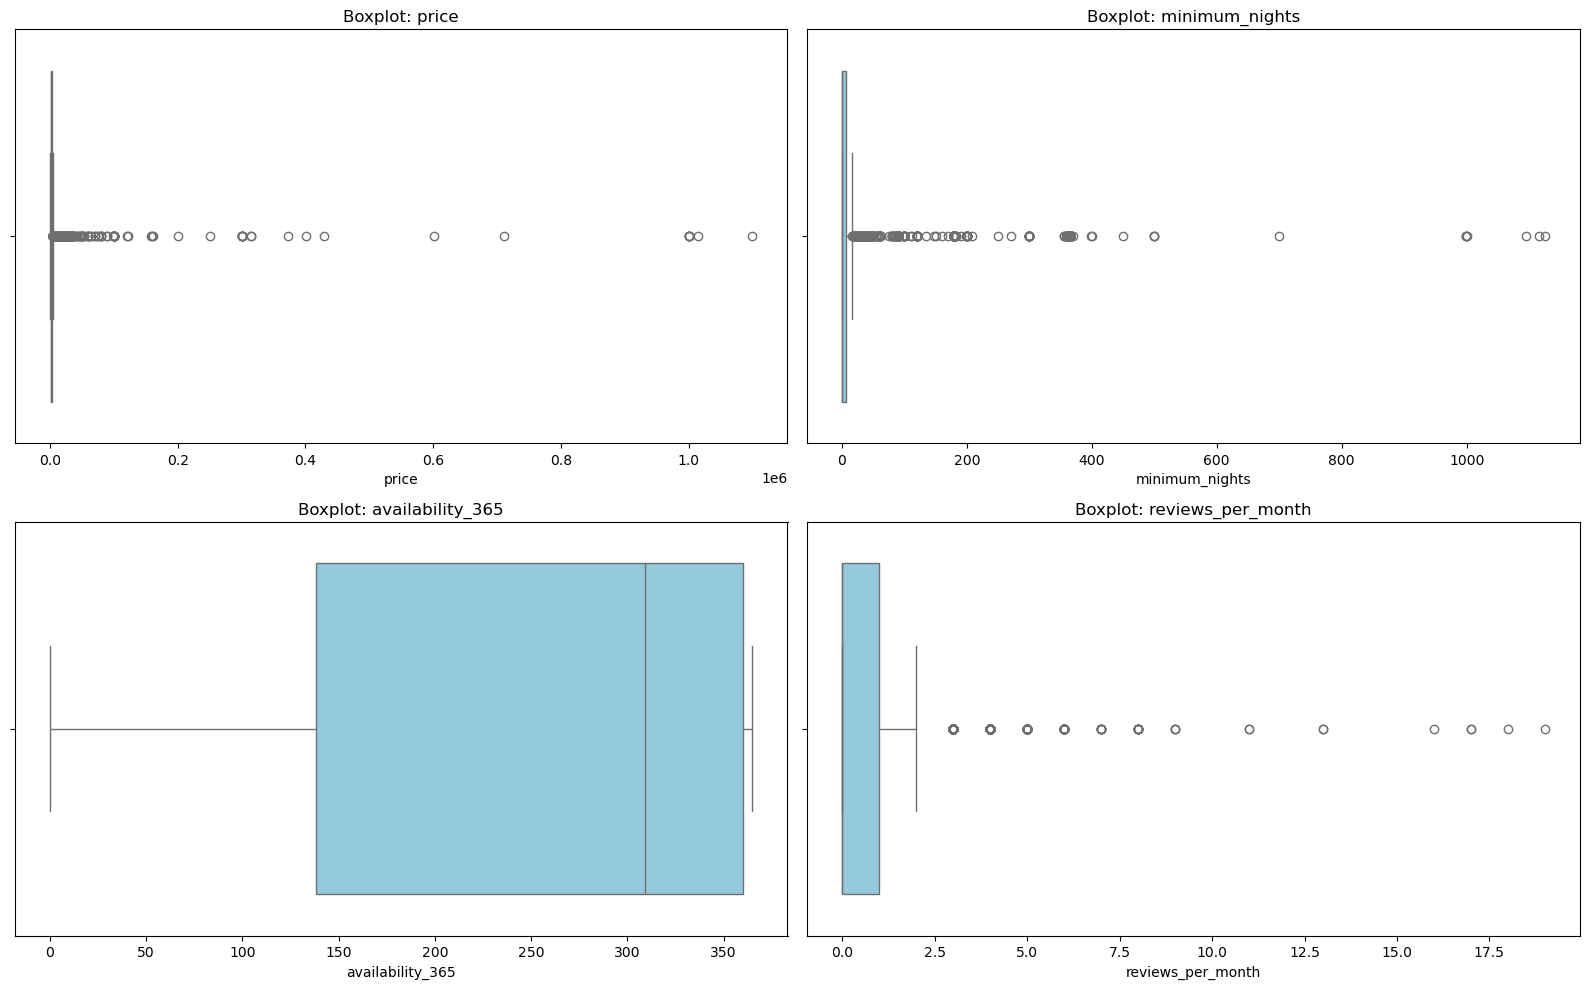

In [4506]:
# Kolom yang akan divisualisasikan outlier-nya
columns_to_plot = ['price', 'minimum_nights', 'availability_365', 'reviews_per_month']

# Ukuran figure
plt.figure(figsize=(16, 10))

# Loop untuk membuat 3 boxplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_clean[column], color='skyblue')
    plt.title(f'Boxplot: {column}', fontsize=12)

plt.tight_layout()
plt.show()

Berikut hasil deteksi outlier menggunakan boxplot untuk 3 kolom numerik utama:
* `price` – Terdapat banyak outlier di bagian harga tinggi.
* `minimum_nights` – Ada outlier pada nilai minimum nights yang sangat tinggi (ratusan hingga ribuan malam).
* `availability_365` – Distribusi relatif normal, outlier sangat sedikit.
* `reviews_per_month` - Sebagian besar properti memiliki sedikit atau bahkan nol ulasan per bulan.

### Filterisasi Outlier

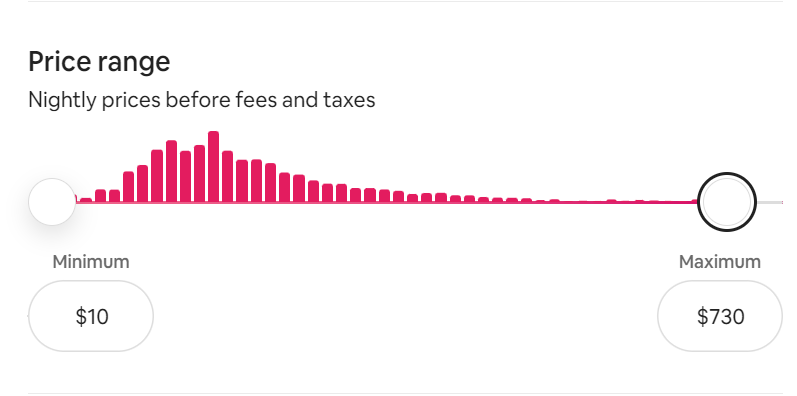

In [4507]:
Image("Harga Maks Airbnb Bangkok.png")

Sumber Gambar : airbnb.com
* Gambar diatas menunjukkan rentang harga penginapan di Bangkok, Thailand untuk 1 malam dari yang paling rendah sampai yang paling tinggi pada Peak Season. Harga maksimum yang ditawarkan oleh pemilik properti untuk pengunjung sebesar $730 dilihat dari barplot berawarna merah yang merepresentasikan banyaknya properti di harga tertentu (semakin rendah bar nya berarti properti di harga tersebut sangat jarang), jika dikonversi ke kurs thailand menjadi **25.122,22 THB**. nilai ini jika dikonversi lagi ke rupiah sama dengan Rp. 12.088.812,26. Maka dapat disimpulkan harga menginap per malam di bangkok paling mahal tidak mencapai **1.100.000,00 THB** sehingga untuk mencegah bias pada analisis potential lost maka kolom `price` perlu difilter.

In [4508]:
# --- FILTER 1: Drop listing dengan harga 0 atau terlalu tinggi ---
df_filtered = df_clean[(df_clean['price'] > 0) & (df_clean['price'] <= 30000)]  # harga maks disesuaikan, misal 30.000 Baht

# --- FILTER 2: Drop listing dengan minimum nights sangat tinggi (> 365 malam) ---
df_filtered = df_filtered[df_filtered['minimum_nights'] <= 365]

# --- FILTER 3: Drop listing yang tidak tersedia (availability_365 = 0) ---
df_filtered = df_filtered[df_filtered['availability_365'] > 0]

# Cek hasil setelah filtering
print("Jika data outlier menyebabkan error pada analisa Potential Lost, maka data outlier perlu di-drop dan gunakan df_filtered.")
print("Jumlah data sebelum filter:", len(df_clean))
print("Jumlah data setelah filter :", len(df_filtered))

Jika data outlier menyebabkan error pada analisa Potential Lost, maka data outlier perlu di-drop dan gunakan df_filtered.
Jumlah data sebelum filter: 15854
Jumlah data setelah filter : 14903


1. Price (Harga listing) :
    * Filter: Harga terlalu rendah (misal = 0) atau terlalu tinggi (contoh > 100.000 Baht)
    * Alasan:
       * Harga 0 biasanya data error.
       * Harga sangat tinggi bisa jadi luxury property yang bukan representasi mayoritas. Jika dianalisis bersama properti biasa, hasilnya bias.

2. Minimum Nights (Jumlah minimum malam) :
    * Filter: Nilai terlalu tinggi (contoh > 365 malam)
    * Alasan:
       * Tidak realistis untuk short-term rental.
       * Listing seperti ini kemungkinan tidak laku, dan akan mempengaruhi perhitungan okupansi dan potential lost secara berlebihan.

3. Availability_365 (Ketersediaan listing per tahun) :
    * Filter: Nilai 0 hari
    * Alasan:
       * Listing tidak tersedia berarti tidak bisa disewa, tidak relevan untuk analisa revenue/lost.

### E. Cek Model Statistik 

Data tidak terdistribusi dengan normal maka menggunakan uji non-parametrik t-test untuk membandingkan lost potential mana yang lebih besar di antara 3 segment

## 4. Analisis Potential Lost dan Return of Investemnt (ROI) relatif

Sebelum masuk analisis lebih lanjut, saya akan menambahkan kolom baru yakni `revenue_per_year` , `price_category` , dan `occupancy_potential`. 3 kolom ini akan terpakai untuk menganalisa 3 segmen penyebab Potential Lost bagi host property dan Airbnb.  

Segmen 1 : Harga murah tapi tingkat okupansi rendah  
Segmen 2 : Tingkat okupansi tinggi karena harga murah  
Segmen 3 : Harga mahal tapi tingkat okupansi tetap tinggi 

Menghitung estimasi Pendapatan per Tahun berdasarkan harga dan ketersediaan 

In [4509]:
df_filtered['revenue_per_year'] = df_filtered['price'] * df_filtered['availability_365']
df_filtered

id                                                name  \
0                   27934                     Nice room with superb city view   
1                   27979                      Easy going landlord,easy place   
2                   28745                   modern-style apartment in Bangkok   
3                   35780      Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                          Suite Room 3 at MetroPoint   
...                   ...                                                 ...   
15849  790465040741092826       素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea   
15851  790475335086864240   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id   host_name neighbourhood   latitude   longitude  \
0         120437      Nuttee   Ratchathewi  13.759830  100.541340   
1         120541         Emy       Bang Na  13.668180  100.616740   
2         123784  Familyroom     Bang Kapi  13.752320  100.624020   
3         153730     Sirilak     Din Daeng  13.788230  100.572560   
4         610315       Kasem     Bang Kapi  13.768720  100.633380   
...          ...         ...           ...        ...         ...   
15849   94899359       Renee       Pra Wet  13.715132  100.653458   
15850  491526222   Phakhamon   Ratchathewi  13.753052  100.538738   
15851  491526222   Phakhamon   Ratchathewi  13.753169  100.538700   
15852  491526222   Phakhamon   Ratchathewi  13.754789  100.538757   
15853  491526222   Phakhamon   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews  \
0      Entire home/apt   1905               3                 65   
1         Private room   1316               1                  0   
2         Private room    800              60                  0   
3         Private room   1286               7                  2   
4         Private room   1905               1                  0   
...                ...    ...             ...                ...   
15849     Private room   2298              28                  0   
15850     Private room   1429               1                  0   
15851     Private room   1214               1                  0   
15852     Private room   1214               1                  0   
15853     Private room   1214               1                  0   

               last_review  reviews_per_month  calculated_host_listings_count  \
0                    -2012                  0                               2   
1                    -2012                  0                               2   
2                    -2012                  0                               1   
3      2022-04-01 00:00:00                  0                               1   
4                    -2012                  0                               3   
...                    ...                ...                             ...   
15849                -2012                  0                               1   
15850                -2012                  0                              14   
15851                -2012                  0                              14   
15852                -2012                  0                              14   
15853                -2012                  0                              14   

       availability_365  number_of_reviews_ltm  revenue_per_year  
0                   353                      0            672465  
1                   358                      0            471128  
2                   365                      0            292000  
3                   323                      1            415378  
4                   365                      0            695325  
...                 ...      

Kategorisasi harga menjadi 4 kategori yakni Low, Medium, High, dan Luxury

In [4510]:
df_filtered['price_category'] = pd.cut(df_filtered['price'], 
                              bins=[0, 500, 1000, 5000, df['price'].max()], 
                              labels=['Low', 'Medium', 'High', 'Luxury'])
df_filtered

id                                                name  \
0                   27934                     Nice room with superb city view   
1                   27979                      Easy going landlord,easy place   
2                   28745                   modern-style apartment in Bangkok   
3                   35780      Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                          Suite Room 3 at MetroPoint   
...                   ...                                                 ...   
15849  790465040741092826       素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea   
15851  790475335086864240   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id   host_name neighbourhood   latitude   longitude  \
0         120437      Nuttee   Ratchathewi  13.759830  100.541340   
1         120541         Emy       Bang Na  13.668180  100.616740   
2         123784  Familyroom     Bang Kapi  13.752320  100.624020   
3         153730     Sirilak     Din Daeng  13.788230  100.572560   
4         610315       Kasem     Bang Kapi  13.768720  100.633380   
...          ...         ...           ...        ...         ...   
15849   94899359       Renee       Pra Wet  13.715132  100.653458   
15850  491526222   Phakhamon   Ratchathewi  13.753052  100.538738   
15851  491526222   Phakhamon   Ratchathewi  13.753169  100.538700   
15852  491526222   Phakhamon   Ratchathewi  13.754789  100.538757   
15853  491526222   Phakhamon   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews  \
0      Entire home/apt   1905               3                 65   
1         Private room   1316               1                  0   
2         Private room    800              60                  0   
3         Private room   1286               7                  2   
4         Private room   1905               1                  0   
...                ...    ...             ...                ...   
15849     Private room   2298              28                  0   
15850     Private room   1429               1                  0   
15851     Private room   1214               1                  0   
15852     Private room   1214               1                  0   
15853     Private room   1214               1                  0   

               last_review  reviews_per_month  calculated_host_listings_count  \
0                    -2012                  0                               2   
1                    -2012                  0                               2   
2                    -2012                  0                               1   
3      2022-04-01 00:00:00                  0                               1   
4                    -2012                  0                               3   
...                    ...                ...                             ...   
15849                -2012                  0                               1   
15850                -2012                  0                              14   
15851                -2012                  0                              14   
15852                -2012                  0                              14   
15853                -2012                  0                              14   

       availability_365  number_of_reviews_ltm  revenue_per_year  \
0                   353                      0            672465   
1                   358                      0            471128   
2                   365                      0            292000   
3                   323                      1            415378   
4                   365                      0            695325   
...                 ...

Menghitung potensi tingkat keterisian/seberapa sering dipesan untuk setiap properti

In [4511]:
df_filtered['occupancy_potential'] = ((df_filtered['availability_365'] / df_filtered['minimum_nights']) / 365) * 100
df_filtered['occupancy_potential'] = df_filtered['occupancy_potential'].round(2).astype(str) + '%'
df_filtered

id                                                name  \
0                   27934                     Nice room with superb city view   
1                   27979                      Easy going landlord,easy place   
2                   28745                   modern-style apartment in Bangkok   
3                   35780      Spacious one bedroom at The Kris Condo Bldg. 3   
4                  941865                          Suite Room 3 at MetroPoint   
...                   ...                                                 ...   
15849  790465040741092826       素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea   
15851  790475335086864240   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id   host_name neighbourhood   latitude   longitude  \
0         120437      Nuttee   Ratchathewi  13.759830  100.541340   
1         120541         Emy       Bang Na  13.668180  100.616740   
2         123784  Familyroom     Bang Kapi  13.752320  100.624020   
3         153730     Sirilak     Din Daeng  13.788230  100.572560   
4         610315       Kasem     Bang Kapi  13.768720  100.633380   
...          ...         ...           ...        ...         ...   
15849   94899359       Renee       Pra Wet  13.715132  100.653458   
15850  491526222   Phakhamon   Ratchathewi  13.753052  100.538738   
15851  491526222   Phakhamon   Ratchathewi  13.753169  100.538700   
15852  491526222   Phakhamon   Ratchathewi  13.754789  100.538757   
15853  491526222   Phakhamon   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews  \
0      Entire home/apt   1905               3                 65   
1         Private room   1316               1                  0   
2         Private room    800              60                  0   
3         Private room   1286               7                  2   
4         Private room   1905               1                  0   
...                ...    ...             ...                ...   
15849     Private room   2298              28                  0   
15850     Private room   1429               1                  0   
15851     Private room   1214               1                  0   
15852     Private room   1214               1                  0   
15853     Private room   1214               1                  0   

               last_review  reviews_per_month  calculated_host_listings_count  \
0                    -2012                  0                               2   
1                    -2012                  0                               2   
2                    -2012                  0                               1   
3      2022-04-01 00:00:00                  0                               1   
4                    -2012                  0                               3   
...                    ...                ...                             ...   
15849                -2012                  0                               1   
15850                -2012                  0                              14   
15851                -2012                  0                              14   
15852                -2012                  0                              14   
15853                -2012                  0                              14   

       availability_365  number_of_reviews_ltm  revenue_per_year  \
0                   353                      0            672465   
1                   358                      0            471128   
2                   365                      0            292000   
3                   323                      1            415378   
4                   365                      0            695325   
...                 ...

### **Segment 1** - Mendeteksi properti murah tapi tetap sepi/sedikit tingkat pemesanan

Filter properti dengan harga murah (price dengan kategori low) dan occupancy rate rendah (di bawah 30%)

In [4567]:
harga_di_bawah_200 = df_filtered[df_filtered['price'] < 300]
display(harga_di_bawah_200[['name', 'price', 'occupancy_potential']])

name  price  \
15401  Mixed Dorm 10 Bunkbed at Amazing khaosan Hostel 2    280   
15455                    1 Upper-Bunk Bed /w Shared Bath    280   
15456                    1 Lower-Bunk Bed /w Shared Bath    280   
15473                            Flourish Capsule Hostel    295   
15551           Artist Private AirRoom 10min2PetFriendly    278   

       occupancy_potential  
15401                97.53  
15455               100.00  
15456               100.00  
15473                48.22  
15551                94.52

In [4513]:
df_filtered['occupancy_potential'] = df_filtered['occupancy_potential'].str.rstrip('%').astype(float)

In [4514]:
low_price_low_occupancy = df_filtered[(df_filtered['price'] >= 0) & (df_filtered['price_category'] == 'Low') & (df_filtered['occupancy_potential'] < 30)]
display(low_price_low_occupancy[['name', 'price', 'price_category', 'occupancy_potential']])

name  price price_category  \
45                              Private room in Bangkok    350            Low   
60            Apr. for rent full fur 1 bedroom, monthly    400            Low   
68                            Mix Dorm  Decor do Hostel    350            Low   
133                         Studio ๏ Affordable comfort    500            Low   
406                                      The Lighthouse    500            Low   
...                                                 ...    ...            ...   
15635                   1 bedroom Lugona condo Lap Prao    450            Low   
15657         CB’S Cheap Boutique King Balcony Fan Room    356            Low   
15663                  Condominium in Bang Sue, Bangkok    440            Low   
15760    CB's - Cheap Boutique Queen AC Room in Bangkok    380            Low   
15842  1 Bed for 1 person Close to Chatuchak market BTS    499            Low   

       occupancy_potential  
45                    3.33  
60                    0.55  
68                   23.84  
133                   3.33  
406                   0.28  
...                    ...  
15635                 2.59  
15657                 3.15  
15663                11.23  
15760                 4.84  
15842                20.00  

[322 rows x 4 columns]

Mengekstrak fasilitas dari setiap property dari kolom name karena nama property nya tergabung dengan fasilitas properti tersebut maka perlu diekstrak menggunakan regular expression (regex)

In [4515]:
# Daftar fasilitas yang mungkin ada dalam nama
facility_keywords = ['station', 'park view', 'attraction' ,'siam university','terminal','dormitory','downtown','full furnish','near Sukhumvit',
                     'coworking','near cbd','sky train','near fashion island','private entrance','mall','AC','fully facilities','car park','balcony', 
                     'Free Wifi', 'FreeWifi', 'Fully Furnished', 'Fully Equipped', 'A/C', 'Pool', 'Gym', 'Sauna', 'BTS', 'Subway', 'City Center', 'MRT', 
                     'Airport', 'Skytrain', 'Supermarkets', 'Breakfast', 'Kitchen', 'Parking', 'Netflix', 'Hospital', 'Free Pickup', 'Bkk Centre', 'River View', 'Laundry']
# Fungsi untuk memisahkan fasilitas
def extract_facilities(name):
    found_facilities = [facility for facility in facility_keywords if facility.lower() in name.lower()]
    return ', '.join(found_facilities) if found_facilities else None

# Terapkan fungsi ke kolom 'name'
df_filtered['facilities'] = df_filtered['name'].apply(extract_facilities)

# Buat kolom nama properti
df_filtered['name'] = df_filtered['name'].str.replace('|'.join(facility_keywords), '', regex=True).str.strip()

# Tampilkan hasilnya
display(df_filtered[['name', 'facilities']])


name facilities
0                         Nice room with superb city view       None
1                          Easy going landlord,easy place         AC
2                       modern-style apartment in Bangkok       None
3          Spacious one bedroom at The Kris Condo Bldg. 3         AC
4                              Suite Room 3 at MetroPoint       None
...                                                   ...        ...
15849          素坤逸核心两房公寓42楼，靠近on nut/无边天际泳池观赏曼谷夜景/出门当地美食街        BTS
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea       None
15851   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea       None
15852   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea       None
15853   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea       None

[14903 rows x 2 columns]

Melihat apakah ada keterkaitan antara fasilitas yang disediakan dengan tingkat keterisian (occupancy_potential)

In [4516]:
# Terapkan kembali fungsi extract_facilities ke data yang sudah difilter
low_price_low_occupancy['facilities'] = low_price_low_occupancy['name'].apply(extract_facilities)
low_price_low_occupancy['facilities'] = low_price_low_occupancy['facilities'].fillna('No Facility')
# Tampilkan kolom 'name' dan 'facilities'
display(low_price_low_occupancy[['name', 'facilities', 'price', 'occupancy_potential']])

name   facilities  price  \
45                              Private room in Bangkok  No Facility    350   
60            Apr. for rent full fur 1 bedroom, monthly  No Facility    400   
68                            Mix Dorm  Decor do Hostel  No Facility    350   
133                         Studio ๏ Affordable comfort  No Facility    500   
406                                      The Lighthouse  No Facility    500   
...                                                 ...          ...    ...   
15635                   1 bedroom Lugona condo Lap Prao  No Facility    450   
15657         CB’S Cheap Boutique King Balcony Fan Room      balcony    356   
15663                  Condominium in Bang Sue, Bangkok  No Facility    440   
15760    CB's - Cheap Boutique Queen AC Room in Bangkok           AC    380   
15842  1 Bed for 1 person Close to Chatuchak market BTS          BTS    499   

       occupancy_potential  
45                    3.33  
60                    0.55  
68                   23.84  
133                   3.33  
406                   0.28  
...                    ...  
15635                 2.59  
15657                 3.15  
15663                11.23  
15760                 4.84  
15842                20.00  

[322 rows x 4 columns]

Mengambil sampel properti dengan tingkat keterisian paling tinggi dan paling rendah pada segmen harga rendah dan okupansi rendah, disertai faktor fasilitas apakah ada keterkaitan dengan tingkat okupansi

In [4517]:
# Properti dengan occupancy_potential tertinggi
max_occupancy_property = low_price_low_occupancy.loc[low_price_low_occupancy['occupancy_potential'].idxmax()]

# Properti dengan occupancy_potential terendah
min_occupancy_property = low_price_low_occupancy.loc[low_price_low_occupancy['occupancy_potential'].idxmin()]

display(max_occupancy_property[['id', 'name', 'facilities', 'price', 'price_category','occupancy_potential', 'minimum_nights', 'room_type', 'number_of_reviews']])
display(min_occupancy_property[['id', 'name', 'facilities', 'price', 'price_category', 'occupancy_potential', 'minimum_nights', 'room_type', 'number_of_reviews']])

id                            23861669
name                     A min. to BTS
facilities                         BTS
price                              494
price_category                     Low
occupancy_potential              27.95
minimum_nights                       3
room_type              Entire home/apt
number_of_reviews                   51
Name: 4677, dtype: object

id                                         9479689
name                   Ideo Mobi Interchange Jaran
facilities                             No Facility
price                                          450
price_category                                 Low
occupancy_potential                           0.01
minimum_nights                                  30
room_type                             Private room
number_of_reviews                                5
Name: 1492, dtype: object

Dari informasi di atas dapat disimpulkan bahwa listing yang tidak menyediakan fasilitas berdampak pada tingkat okupansi (menjadi rendah). 
* Sampel Listing A : 
    * listing **A min. to BTS** menyediakan fasilitas yakni dekat dengan stasiun BTS sehingga tingkat okupansi nya mencapai 27.95 % kemudian berdampak pada jumlah reviews dari pengunjung sebanyak 51 ulasan
    * listing **A min. to BTS** memiliki kebijakan minimum nights 3 hari sehingga lebih banyak menarik turis dibanding listing B
* Sampel Listing B : 
    * listing **Ideo Mobi Interchange Jaran** tidak menyediakan fasilitas apa pun sehingga tingkat okupansi hanya 0.01 % dan jumlah ulasan yang didapat hanya 5 ulasan
    * listing **Ideo Mobi Interchange Jaran** memiliki kebijakan minimum nights 30 hari, mengurangi minat turis untuk menginap disini karena terlalu lama dan berakibat pada tingkat okupansi yang hanya 0.01%

Selanjutnya kita akan mencari longitude dan latitude dari masing-masing sampel listing A dan B untuk dilihat posisinya pada peta, apakah lokasi properti memang sesuai atau tidak dengan permintaan pasar khususnya bagi turis yang sedang berlibur di Bangkok

In [4518]:
# Ambil latitude dan longitude berdasarkan listing_id
property_1 = df[df['id'] == 23861669][['name', 'latitude', 'longitude']]
property_2 = df[df['id'] == 9479689][['name', 'latitude', 'longitude']]

property_1,property_2

(               name  latitude  longitude
 4677  A min. to BTS  13.67991  100.60939,
                              name  latitude  longitude
 1492  Ideo Mobi Interchange Jaran  13.76297  100.47341)

In [4569]:
# Data properti dengan lat & long
properties = [
    {"name": "A min. to BTS", 
     "facilities": "BTS",
     "price": 494, 
     "occupancy_potential": 27.95, 
     "latitude": 13.67991, "longitude": 100.60939}, 

    {"name": "Ideo Mobi Interchange Jaran", 
     "facilities": "No Facility",
     "price": 450, 
     "occupancy_potential": 0.01, 
     "latitude": 13.76297, "longitude": 100.47341}  
]

# Buat peta dengan titik tengah dari properti
map = folium.Map(location=[13.8, 100.55], tiles = 'CartoDB.Voyager', zoom_start=12)
# Tambahkan marker untuk setiap properti
for prop in properties:
    color = "green" if prop["occupancy_potential"] > 0 else "red"  # Warna hijau untuk yang lebih sering dipesan
    folium.Marker(
        location=[prop["latitude"], prop["longitude"]],
        popup=f"{prop['name']}<br>Facilities: {prop['facilities']}<br>Price Diff: {prop['price']}<br>Occupancy: {prop['occupancy_potential']}%",
        icon=folium.Icon(color=color)
    ).add_to(map)
# Tampilkan peta
map

In [4520]:
# Properti dengan occupancy_potential tertinggi
max_occupancy_property = low_price_low_occupancy.loc[low_price_low_occupancy['occupancy_potential'].idxmax()]

# Properti dengan occupancy_potential terendah
min_occupancy_property = low_price_low_occupancy.loc[low_price_low_occupancy['occupancy_potential'].idxmin()]

display(max_occupancy_property[['neighbourhood']])
display(min_occupancy_property[['neighbourhood']])

neighbourhood    Bang Na
Name: 4677, dtype: object

neighbourhood    Bangkok Noi
Name: 1492, dtype: object

Penyebab okupansi rendah

1. Sampel Listing A : Lokasi strategis dekat stasiun BTS → Ini bisa menjadi nilai jual, bahkan untuk properti berharga murah tetapi masih terkendala kemudahan akses transportasi publik.  
2. Sampel Listing B : Lokasi di Bangkok Noi, yang mungkin tidak sepopuler area pusat kota atau dekat BTS.

Kebijakan yang dibuat pemilik properti dalam menyewakan propertinya ke konsumen sangat bervariasi, jika batas penyewaan lebih dari 7 malam biasanya banyak konsumen enggan untuk memesan karena banyak dari mereka hanya butuh menginap 2-3 hari atau bahkan semalam saja. Maka dibuatlah batasan lebih dari 7 karena kalau banyak yang lebih dari 7 bisa jadi salah satu pemicu jarang dipesan padahal harga murah sehingga dapat menyebabkan Potential Lost.

In [4521]:
# Filter properti dengan harga murah dan okupansi rendah yang memiliki minimum stay lebih dari 7 malam
low_price_low_occupancy_long_stay = low_price_low_occupancy[
    (low_price_low_occupancy['minimum_nights'] > 7) &
    (low_price_low_occupancy['price'] > 0) &
    (low_price_low_occupancy['occupancy_potential'] < 30)
]

# Tampilkan properti dengan harga murah, okupansi rendah, dan minimum stay lama
display(low_price_low_occupancy_long_stay[['name','neighbourhood', 'facilities', 'price', 'occupancy_potential', 'minimum_nights']])

name    neighbourhood  \
45                                Private room in Bangkok       Chatu Chak   
60              Apr. for rent full fur 1 bedroom, monthly          Bang Na   
133                           Studio ๏ Affordable comfort       Phaya Thai   
406                                        The Lighthouse       Khlong San   
668                   Relaxed room, 5 mins to BTS Udomsuk          Bang Na   
...                                                   ...              ...   
15239        Detached House at Soi Viphawadi Rangsit 17-3       Chatu Chak   
15507                       Room connected to BTS Udomsuk          Bang Na   
15536                         Utd inn 30 Sqm Close to BTS          Vadhana   
15596  Lovely Studio 1 bedroom Lat phrao 91 New apartment  Wang Thong Lang   
15635                     1 bedroom Lugona condo Lap Prao       Chatu Chak   

        facilities  price  occupancy_potential  minimum_nights  
45     No Facility    350                 3.33              30  
60     No Facility    400                 0.55             180  
133    No Facility    500                 3.33              30  
406    No Facility    500                 0.28             360  
668            BTS    460                 2.84               8  
...            ...    ...                  ...             ...  
15239           AC    500                 3.31              30  
15507          BTS    472                 3.11              28  
15536          BTS    474                 3.57              28  
15596  No Facility    464                 3.49              28  
15635  No Facility    450                 2.59              30  

[197 rows x 6 columns]

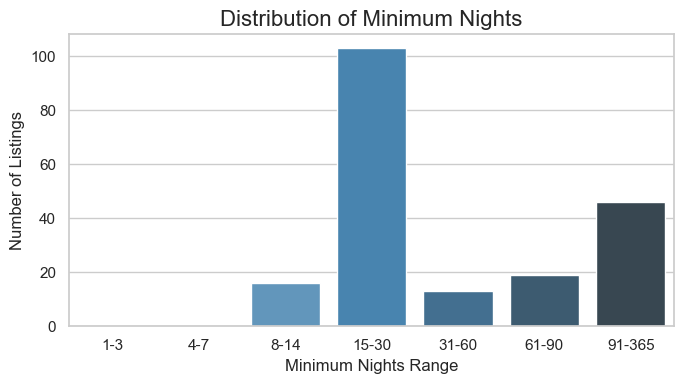

In [4584]:
# Set style biar clean dan modern
sns.set_theme(style="whitegrid")

# Binning minimum_nights jadi kategori agar lebih rapi
bins = [0, 3, 7, 14, 30, 60, 90, 365]
labels = ['1-3', '4-7', '8-14', '15-30', '31-60', '61-90', '91-365']
low_price_low_occupancy_long_stay['min_nights_bin'] = pd.cut(
    low_price_low_occupancy_long_stay['minimum_nights'], bins=bins, labels=labels
)

# Hitung jumlah listing per kategori
min_night_counts = low_price_low_occupancy_long_stay['min_nights_bin'].value_counts().sort_index()

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(x=min_night_counts.index, y=min_night_counts.values, palette="Blues_d")
plt.title('Distribution of Minimum Nights', fontsize=16)
plt.xlabel('Minimum Nights Range', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.tight_layout()
plt.show()

Terdapat 197 listings dari total 322 listings di segmen harga murah okupansi rendah yang memiliki kebijakan minimum nights lebih dari 7 hari, 197 listings ini berpotensi mengurangi pemasukan host dan Airbnb bisa kehilangan potensi pendapatan yang lebih tinggi dari komisi disebabkan oleh 2 kondisi :
1. listing dilengkapi fasilitas tetapi minimum nights tinggi. 
2. listing yang tidak dilengkapi fasilitas + minimum nights tinggi.

In [4600]:
# Inisialisasi peta Bangkok
bangkok_center = [13.7563, 100.5018]
map_low_price_low_occupancy = folium.Map(location=bangkok_center, tiles = 'CartoDB.Voyager', zoom_start=11)

# Ambil neighbourhood unik dan beri warna
neighbourhoods = low_price_low_occupancy_long_stay['neighbourhood'].unique()
palette = sns.color_palette("Set2", len(neighbourhoods)).as_hex()
color_map = dict(zip(neighbourhoods, palette))

# Plot listing berdasarkan lokasi
for _, row in low_price_low_occupancy_long_stay.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color=color_map.get(row['neighbourhood'], '#3186cc'),
        fill=True,
        fill_opacity=0.6
    ).add_to(map_low_price_low_occupancy)

map_low_price_low_occupancy

Mari kita hitung berapa estimasi Potential Lost dan ROI relatif untuk listings di harga murah tetapi tingkat okupansi rendah. 

In [4523]:
# Hitung persentase potential lost
low_price_low_occupancy_long_stay['potential_lost_percentage'] = (1 - (low_price_low_occupancy_long_stay['occupancy_potential'] / 30)) * 100
low_price_low_occupancy_long_stay['potential_lost_percentage'] = low_price_low_occupancy_long_stay['potential_lost_percentage'].round(2)
# Tampilkan hasil
display(low_price_low_occupancy_long_stay[['name', 'neighbourhood', 'facilities',  'occupancy_potential', 
                                           'minimum_nights', 'potential_lost_percentage']])

name    neighbourhood  \
45                                Private room in Bangkok       Chatu Chak   
60              Apr. for rent full fur 1 bedroom, monthly          Bang Na   
133                           Studio ๏ Affordable comfort       Phaya Thai   
406                                        The Lighthouse       Khlong San   
668                   Relaxed room, 5 mins to BTS Udomsuk          Bang Na   
...                                                   ...              ...   
15239        Detached House at Soi Viphawadi Rangsit 17-3       Chatu Chak   
15507                       Room connected to BTS Udomsuk          Bang Na   
15536                         Utd inn 30 Sqm Close to BTS          Vadhana   
15596  Lovely Studio 1 bedroom Lat phrao 91 New apartment  Wang Thong Lang   
15635                     1 bedroom Lugona condo Lap Prao       Chatu Chak   

        facilities  occupancy_potential  minimum_nights  \
45     No Facility                 3.33              30   
60     No Facility                 0.55             180   
133    No Facility                 3.33              30   
406    No Facility                 0.28             360   
668            BTS                 2.84               8   
...            ...                  ...             ...   
15239           AC                 3.31              30   
15507          BTS                 3.11              28   
15536          BTS                 3.57              28   
15596  No Facility                 3.49              28   
15635  No Facility                 2.59              30   

       potential_lost_percentage  
45                         88.90  
60                         98.17  
133                        88.90  
406                        99.07  
668                        90.53  
...                          ...  
15239                      88.97  
15507                      89.63  
15536                      88.10  
15596                      88.37  
15635                      91.37  

[197 rows x 6 columns]

In [4524]:
# Hitung rata-rata potential lost dalam persen
average_potential_lost_percentage = low_price_low_occupancy_long_stay['potential_lost_percentage'].mean()
print(f"Rata-rata Potential Lost (Persentase): {average_potential_lost_percentage:.2f}%")

Rata-rata Potential Lost (Persentase): 93.80%


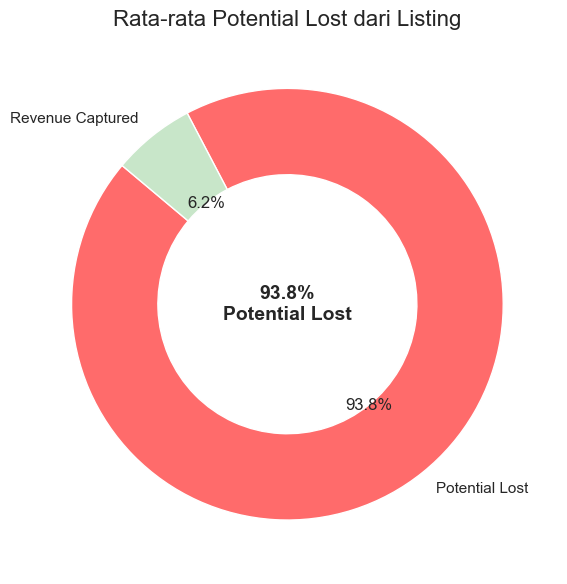

In [4587]:
# Data
lost_percentage = 93.80
kept_percentage = 100 - lost_percentage
sizes = [lost_percentage, kept_percentage]
labels = ['Potential Lost', 'Revenue Captured']
colors = ['#FF6B6B', '#C8E6C9']  # merah dan hijau pastel

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4)  # Donut
)

# Tambahkan teks tengah
plt.text(0, 0, "93.8%\nPotential Lost", ha='center', va='center', fontsize=14, weight='bold')
plt.title('Rata-rata Potential Lost dari Listing', fontsize=16)
plt.tight_layout()
plt.show()

Rata-rata properti di segmen murah tapi sepi kehilangan 93.8% dari malam yang bisa disewakan setiap bulan.

1. Mayoritas properti di segmen ini sangat underperforming.
2. Mereka hanya berhasil menyewakan sekitar 6.2% dari total malam tersedia — bisa dibilang hampir kosong sepanjang waktu.

Kita lanjut menghitung Return of Investment (ROI) relatif untuk mengetahui berapa keuntungan yang bisa diambil oleh host properti untuk tiap listing per tahun

In [4525]:
# Tambahkan kolom Actual Revenue
low_price_low_occupancy_long_stay['actual_revenue'] = low_price_low_occupancy_long_stay['occupancy_potential'] * low_price_low_occupancy_long_stay['price']

# Hitung ROI Relatif
low_price_low_occupancy_long_stay['roi_relative'] = (
    low_price_low_occupancy_long_stay['actual_revenue'] / 
    (low_price_low_occupancy_long_stay['actual_revenue'] + low_price_low_occupancy_long_stay['potential_lost_percentage'])
) * 100
low_price_low_occupancy_long_stay['roi_relative'] = low_price_low_occupancy_long_stay['roi_relative'].round(2)

# Tampilkan hasil
display(low_price_low_occupancy_long_stay[['name', 'neighbourhood', 'actual_revenue', 'potential_lost_percentage', 'roi_relative']])


name    neighbourhood  \
45                                Private room in Bangkok       Chatu Chak   
60              Apr. for rent full fur 1 bedroom, monthly          Bang Na   
133                           Studio ๏ Affordable comfort       Phaya Thai   
406                                        The Lighthouse       Khlong San   
668                   Relaxed room, 5 mins to BTS Udomsuk          Bang Na   
...                                                   ...              ...   
15239        Detached House at Soi Viphawadi Rangsit 17-3       Chatu Chak   
15507                       Room connected to BTS Udomsuk          Bang Na   
15536                         Utd inn 30 Sqm Close to BTS          Vadhana   
15596  Lovely Studio 1 bedroom Lat phrao 91 New apartment  Wang Thong Lang   
15635                     1 bedroom Lugona condo Lap Prao       Chatu Chak   

       actual_revenue  potential_lost_percentage  roi_relative  
45            1165.50                      88.90         92.91  
60             220.00                      98.17         69.15  
133           1665.00                      88.90         94.93  
406            140.00                      99.07         58.56  
668           1306.40                      90.53         93.52  
...               ...                        ...           ...  
15239         1655.00                      88.97         94.90  
15507         1467.92                      89.63         94.25  
15536         1692.18                      88.10         95.05  
15596         1619.36                      88.37         94.83  
15635         1165.50                      91.37         92.73  

[197 rows x 5 columns]

In [4526]:
average_roi_relative = low_price_low_occupancy_long_stay['roi_relative'].mean()
print(f"Rata-rata ROI Relatif: {average_roi_relative:.2f}%")

Rata-rata ROI Relatif: 77.31%


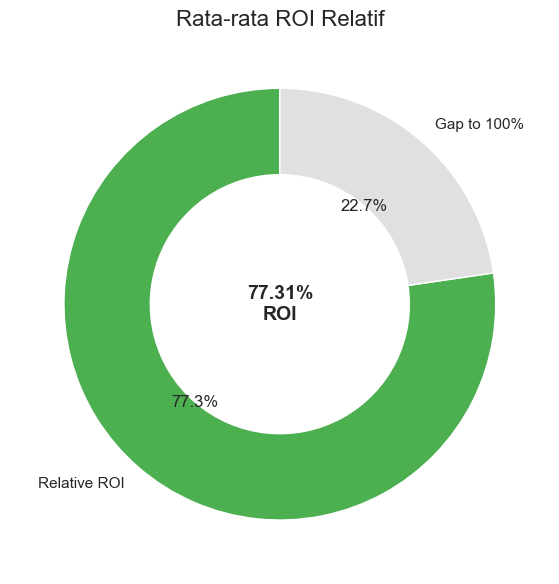

In [4589]:
# Data
roi_percentage = 77.31
gap = 100 - roi_percentage
sizes = [roi_percentage, gap]
labels = ['Relative ROI', 'Gap to 100%']
colors = ['#4CAF50', '#E0E0E0']  # hijau dan abu muda

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4)
)

# Tambahkan angka tengah
plt.text(0, 0, "77.31%\nROI", ha='center', va='center', fontsize=14, weight='bold')

# Estetika
plt.title('Rata-rata ROI Relatif', fontsize=16)
plt.tight_layout()
plt.show()

* Dari total potensi revenue (actual revenue + potential lost), 77.31% berhasil mereka dapatkan — berdasarkan listing yang tersisa di segmen itu.

* Meskipun okupansinya rendah (high potential lost), sebagian properti tetap memiliki harga yang cukup tinggi, sehingga nilai ROI relatifnya masih terjaga.
Dengan kata lain:

    * Properti yang berhasil disewa, menyumbang pendapatan besar meski jumlah malamnya sedikit.

    * Kehilangan dari sisi jumlah malam, tapi bukan berarti kehilangan besar dari sisi uang.

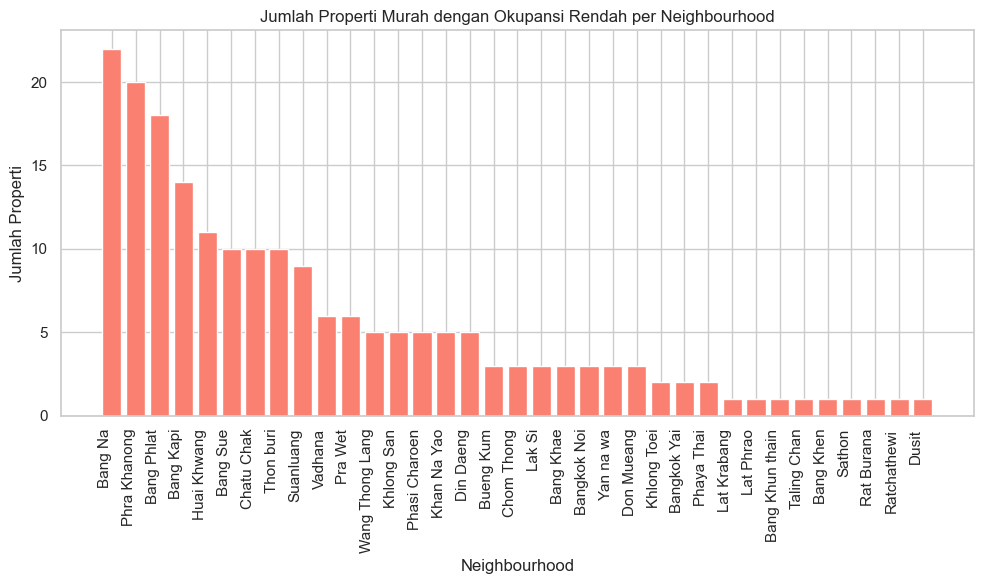

In [4607]:
# Hitung jumlah properti per neighbourhood dari DataFrame low_price_low_occupancy
neighbourhood_counts = low_price_low_occupancy_long_stay['neighbourhood'].value_counts()
neighbourhood_counts_df = neighbourhood_counts.reset_index()
neighbourhood_counts_df.columns = ['Neighbourhood', 'Jumlah Properti']

# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(neighbourhood_counts_df['Neighbourhood'], neighbourhood_counts_df['Jumlah Properti'], color='salmon')
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Properti')
plt.title('Jumlah Properti Murah dengan Okupansi Rendah per Neighbourhood')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Berdasarkan persebaran jumlah listing murah dan berokupansi rendah di Bangkok, terlihat bahwa wilayah seperti Bang Na, Phra Khanong, dan Bang Phlat menampung lebih dari 25% dari total properti dalam segmen ini. Fakta ini mengindikasikan potensi persaingan ketat, oversupply listing, atau minimnya daya tarik lokasi. Hal ini berkontribusi terhadap tingginya potential lost (rata-rata 93.8%) dan ROI relatif yang tidak optimal (77.3%).

Kita akan lanjut dengan menghitung rata-rata Potential Lost (%) dan ROI Relatif per neighbourhood. Perhitungan ini berguna untuk mengetahui distrik mana yang paling merugi secara performa listing.

In [4564]:
# Hitung rata-rata Potential Lost (%) dan ROI Relatif per neighbourhood
summary_by_neighbourhood = low_price_low_occupancy_long_stay.groupby('neighbourhood').agg({
    'price': 'mean',
    'occupancy_potential': 'mean',
    'potential_lost_percentage': 'mean',
    'roi_relative': 'mean',
    'name': 'count'  
}).reset_index()

# Ganti nama kolom biar lebih rapi
summary_by_neighbourhood.rename(columns={
    'price':'ave_price',
    'occupancy_potential': 'avg_occupancy_potential',
    'potential_lost_percentage': 'avg_potential_lost_percent',
    'roi_relative': 'avg_roi_relatif_percent',
    'name': 'total_listings'
}, inplace=True)

# Bulatkan angka ke 2 digit di belakang koma
summary_by_neighbourhood['ave_price'] = summary_by_neighbourhood['ave_price'].round(2)
summary_by_neighbourhood['avg_occupancy_potential'] = summary_by_neighbourhood['avg_occupancy_potential'].round(2)
summary_by_neighbourhood['avg_potential_lost_percent'] = summary_by_neighbourhood['avg_potential_lost_percent'].round(2)
summary_by_neighbourhood['avg_roi_relatif_percent'] = summary_by_neighbourhood['avg_roi_relatif_percent'].round(2)

# Urutkan berdasarkan rata-rata potential lost tertinggi
summary_by_neighbourhood.sort_values(by='avg_potential_lost_percent', ascending=False, inplace=True)

# Tampilkan hasil
display(summary_by_neighbourhood)

neighbourhood  ave_price  avg_occupancy_potential  \
14            Dusit     480.00                     0.01   
27      Ratchathewi     500.00                     0.16   
2         Bang Khen     494.00                     0.27   
28           Sathon     500.00                     0.27   
26       Rat Burana     363.00                     0.27   
17       Khlong San     466.00                     0.44   
7       Bangkok Noi     433.33                     0.46   
21        Lat Phrao     365.00                     0.56   
19           Lak Si     466.67                     0.59   
8       Bangkok Yai     417.50                     0.68   
12        Din Daeng     433.80                     0.70   
22    Phasi Charoen     425.40                     0.93   
31        Thon buri     422.80                     0.95   
20      Lat Krabang     460.00                     1.11   
32          Vadhana     421.83                     1.17   
34        Yan na wa     422.67                     1.23   
24     Phra Khanong     417.30                     1.28   
9         Bueng Kum     358.67                     1.52   
30      Taling Chan     450.00                     1.64   
29        Suanluang     434.89                     1.81   
18      Khlong Toei     416.00                     1.90   
23       Phaya Thai     500.00                     1.94   
33  Wang Thong Lang     436.80                     1.97   
16      Khan Na Yao     419.00                     2.06   
5        Bang Phlat     452.83                     2.07   
10       Chatu Chak     441.30                     2.08   
13       Don Mueang     415.33                     2.11   
3   Bang Khun thain     450.00                     2.21   
15      Huai Khwang     462.91                     2.26   
4           Bang Na     445.09                     2.29   
11       Chom Thong     426.67                     2.35   
6          Bang Sue     450.80                     2.97   
0         Bang Kapi     418.21                     3.11   
1         Bang Khae     382.00                     3.43   
25          Pra Wet     405.33                     3.43   

    avg_potential_lost_percent  avg_roi_relatif_percent  total_listings  
14                       99.97                     4.58               1  
27                       99.47                    44.58               1  
2                        99.10                    57.37               1  
28                       99.10                    57.67               1  
26                       99.10                    49.72               1  
17                       98.54                    64.52               5  
7                        98.48                    50.86               3  
21                       98.13                    67.56               1  
19                       98.02                    72.44               3  
8                        97.73                    73.30               2  
12                       97.67                    70.10               5  
22                       96.89                    69.84               5  
31                       96.84                    65.14              10  
20                       96.30                    84.13               1  
32                       96.11                    68.11               6  
34                       95.91                    67.23               3  
24                       95.74                    69.92              20  
9                        94.94                    78.70               3  
30                       94.53                    88.65               1  
29                       93.97                    73.03               9  
18                       93.65                    74.41               2  
23                       93.52                    84.49               2  
33                       93.45                    81.39               5  
16                       93.15                    85.27               5  
5                        93.11 

In [4529]:
# Tambahkan kolom zona berdasarkan skor potential lost
def assign_zone(avg_potential_lost_percent):
    if avg_potential_lost_percent >= 95:
        return 'Merah'   # Risiko Tinggi
    elif avg_potential_lost_percent >= 90:
        return 'Kuning'  # Risiko Sedang
    else:
        return 'Hijau'   # Risiko Rendah

summary_by_neighbourhood['risk_zone'] = summary_by_neighbourhood['avg_potential_lost_percent'].apply(assign_zone)

# Tampilkan hasil dengan zona risiko
display(summary_by_neighbourhood[['neighbourhood', 'avg_potential_lost_percent', 'risk_zone']])

neighbourhood  avg_potential_lost_percent risk_zone
14            Dusit                       99.97     Merah
27      Ratchathewi                       99.47     Merah
2         Bang Khen                       99.10     Merah
28           Sathon                       99.10     Merah
26       Rat Burana                       99.10     Merah
17       Khlong San                       98.54     Merah
7       Bangkok Noi                       98.48     Merah
21        Lat Phrao                       98.13     Merah
19           Lak Si                       98.02     Merah
8       Bangkok Yai                       97.73     Merah
12        Din Daeng                       97.67     Merah
22    Phasi Charoen                       96.89     Merah
31        Thon buri                       96.84     Merah
20      Lat Krabang                       96.30     Merah
32          Vadhana                       96.11     Merah
34        Yan na wa                       95.91     Merah
24     Phra Khanong                       95.74     Merah
9         Bueng Kum                       94.94    Kuning
30      Taling Chan                       94.53    Kuning
29        Suanluang                       93.97    Kuning
18      Khlong Toei                       93.65    Kuning
23       Phaya Thai                       93.52    Kuning
33  Wang Thong Lang                       93.45    Kuning
16      Khan Na Yao                       93.15    Kuning
5        Bang Phlat                       93.11    Kuning
10       Chatu Chak                       93.06    Kuning
13       Don Mueang                       92.96    Kuning
3   Bang Khun thain                       92.63    Kuning
15      Huai Khwang                       92.47    Kuning
4           Bang Na                       92.38    Kuning
11       Chom Thong                       92.16    Kuning
6          Bang Sue                       90.11    Kuning
0         Bang Kapi                       89.64     Hijau
1         Bang Khae                       88.56     Hijau
25          Pra Wet                       88.55     Hijau

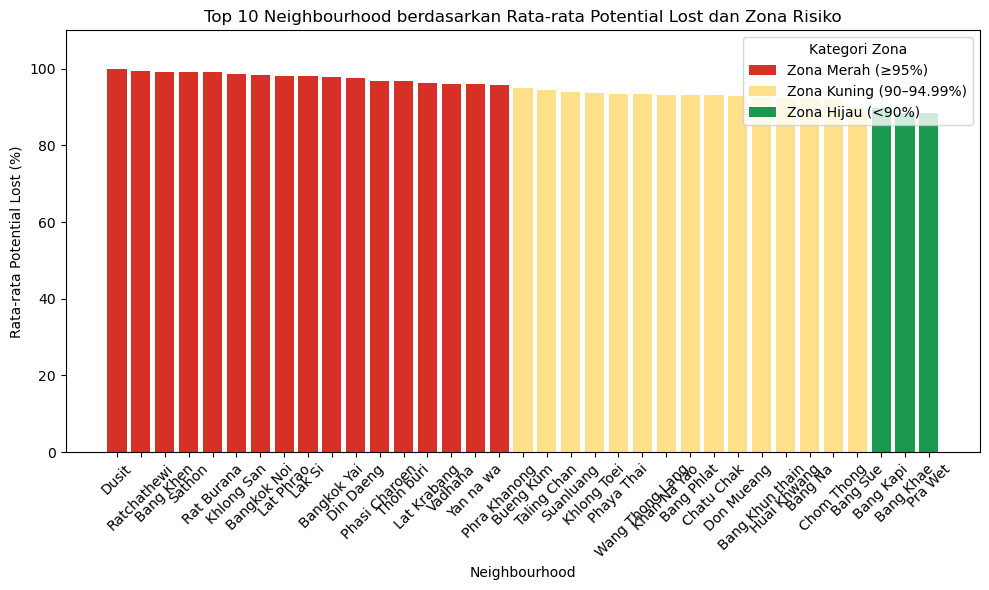

In [4530]:
# Ambil top 10 neighbourhood
top10 = summary_by_neighbourhood

# Map zona warna
color_map = {
    'Merah': '#d73027',
    'Kuning': '#fee08b',
    'Hijau': '#1a9850'
}
colors = top10['risk_zone'].map(color_map)

# Plot manual dengan warna per bar
plt.figure(figsize=(10, 6))
bars = plt.bar(top10['neighbourhood'], top10['avg_potential_lost_percent'], color=colors)
plt.title('Top 10 Neighbourhood berdasarkan Rata-rata Potential Lost dan Zona Risiko')
plt.xlabel('Neighbourhood')
plt.ylabel('Rata-rata Potential Lost (%)')
plt.xticks(rotation=45)
plt.ylim(0, 110)

# Tambahkan legenda manual
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#d73027', label='Zona Merah (≥95%)'),
    Patch(facecolor='#fee08b', label='Zona Kuning (90–94.99%)'),
    Patch(facecolor='#1a9850', label='Zona Hijau (<90%)')
]
plt.legend(handles=legend_elements, title="Kategori Zona")
plt.tight_layout()
plt.show()

1. Zona Merah (≥ 95%) — Risiko Tertinggi
* Neighbourhood seperti Dusit, Ratchathewi, Bang Khen, Sathon, dan Rat Burana masuk ke zona merah. Artinya:
    * Rata-rata potential lost mereka hampir maksimum, mendekati atau menyentuh 100%.
    * Listing dengan harga murah dan okupansi rendah di area ini tidak menghasilkan revenue optimal — bisa disebabkan oleh lokasi kurang strategis, permintaan rendah, atau pengelolaan yang tidak efisien.
2. Zona Kuning (90–94.99%) — Risiko Sedang
* Beberapa neighbourhood seperti Chom Thong, Din Daeng, Khlong Sam Wa, Bang Kapi, dan Wang Thonglang berada dalam kategori ini:
    * Masih berisiko tinggi, tapi tidak separah zona merah.
    * Potensi recovery lebih besar dengan strategi pemasaran atau promosi mingguan/bulanan.
3. Zona Hijau (<90%) — Risiko Lebih Rendah
* Neighbourhood seperti Bang Khae, Bang Sue, dan Phra Wet masuk zona hijau:
    * Memiliki potential lost yang lebih terkendali.
    * Menunjukkan bahwa harga listing dan okupansi sudah relatif seimbang.

### **Segment 2** - Mencari properti murah yang benar-benar sering dipesan

Properti murah yang benar-benar sering dipesan, dapat mengakibatkan lost potential jika harga properti tersebut terlalu rendah dibandingkan dengan nilai pasarnya atau dibandingkan dengan properti lain yang serupa. Walaupun sering dipesan, jika harga terlalu rendah, pendapatan per malam bisa jadi tidak mencukupi untuk menutupi biaya operasional dan memberikan keuntungan yang diinginkan. Mungkin ada risiko bahwa tingkat okupansi yang tinggi dengan harga murah tidak sebanding dengan penghasilan jangka panjang yang lebih menguntungkan dengan harga yang lebih tinggi.

Peluang untuk Meningkatkan Harga:
Jika properti murah sering dipesan dan permintaan tinggi, ini bisa menjadi indikator untuk menaikkan harga. Namun, jika harga tetap dipertahankan rendah, maka ada potensi pendapatan yang hilang karena host properti tidak memanfaatkan permintaan yang ada untuk meningkatkan harga.

In [4531]:
harga_di_bawah_200 = df_filtered[df_filtered['price'] < 300]
display(harga_di_bawah_200[['name', 'price', 'occupancy_potential']])

name  price  \
15401  Mixed Dorm 10 Bunkbed at Amazing khaosan Hostel 2    280   
15455                    1 Upper-Bunk Bed /w Shared Bath    280   
15456                    1 Lower-Bunk Bed /w Shared Bath    280   
15473                            Flourish Capsule Hostel    295   
15551           Artist Private AirRoom 10min2PetFriendly    278   

       occupancy_potential  
15401                97.53  
15455               100.00  
15456               100.00  
15473                48.22  
15551                94.52

In [4571]:
# Filter properti dengan harga lebih murah dari rata-rata neighbourhood dan occupancy rate tinggi (misalnya di atas 70%)
cheap_high_demand = df_filtered[(df_filtered['price'] >= 0) & 
                       (df_filtered['price_category'] == 'Low') &
                        (df_filtered['occupancy_potential'] > 70)]

# Urutkan berdasarkan occupancy rate tertinggi
cheap_high_demand = cheap_high_demand.sort_values(by='occupancy_potential', ascending=False)

# Pilih kolom yang relevan
display(cheap_high_demand[['name',  'price', 'price_category', 'occupancy_potential']])

name  price price_category  \
5946                    Must be The Place (6-bunk bed)    350            Low   
6128   Stay Monomer, the ideal location (12 Female) 02    400            Low   
6223         Queen size bed - Mixed  - China town, BKK    350            Low   
6337   400Baht/Night | Free WIFI | Superking Size Bed.    400            Low   
7245                  Myhostel Ratchada มายโฮสเทลรัชดา    500            Low   
...                                                ...    ...            ...   
2134                Double bed, Free WiFi,1min walk to    481            Low   
6225        Lovely sweet room @Bussaba condo home near    450            Low   
6308                          includes, 120m/1min to .    379            Low   
10633  Designer service apartment Lat Phrao Bangkapi 3    500            Low   
14936                 120m/1min to , unique and local.    346            Low   

       occupancy_potential  
5946                100.00  
6128                100.00  
6223                100.00  
6337                100.00  
7245                100.00  
...                    ...  
2134                 72.33  
6225                 71.78  
6308                 71.51  
10633                71.23  
14936                70.96  

[365 rows x 4 columns]

In [ ]:
# Extract_facilities ke data yang sudah difilter
cheap_high_demand['facilities'] = cheap_high_demand['name'].apply(extract_facilities)
cheap_high_demand['facilities'] = cheap_high_demand['facilities'].fillna('No Facility')
display(cheap_high_demand[['name', 'facilities', 'occupancy_potential']])

name   facilities  \
5946                    Must be The Place (6-bunk bed)           AC   
6128   Stay Monomer, the ideal location (12 Female) 02  No Facility   
6223         Queen size bed - Mixed  - China town, BKK  No Facility   
6337   400Baht/Night | Free WIFI | Superking Size Bed.    Free Wifi   
7245                  Myhostel Ratchada มายโฮสเทลรัชดา  No Facility   
...                                                ...          ...   
2134                Double bed, Free WiFi,1min walk to    Free Wifi   
6225        Lovely sweet room @Bussaba condo home near  No Facility   
6308                          includes, 120m/1min to .  No Facility   
10633  Designer service apartment Lat Phrao Bangkapi 3  No Facility   
14936                 120m/1min to , unique and local.  No Facility   

       occupancy_potential  
5946                100.00  
6128                100.00  
6223                100.00  
6337                100.00  
7245                100.00  
...                    ...  
2134                 72.33  
6225                 71.78  
6308                 71.51  
10633                71.23  
14936                70.96  

[365 rows x 3 columns]

Properti dengan harga rendah dan laris dipesan (okupansi tinggi) bisa dipicu dari fasilitas yang disediakan host. Fasilitas tersebut antara lain dekat dengan airport, stasiun, halte bis, perlengkapan housing seperti netflix, wifi, laundry, kitchen, pool dapat menarik banyak pelanggan dengan harga terjangkau.

Saya mengambil 2 contoh properti yang paling tinggi dan paling rendah jumlah review pelanggan nya, dengan mempertimbangkan faktor lain.

In [ ]:
# Properti dengan jumlah okupansi tertinggi dan terendah
Max_Occupancy_Property = cheap_high_demand.loc[cheap_high_demand['occupancy_potential'].idxmax()]
Min_Occupancy_Property = cheap_high_demand.loc[cheap_high_demand['occupancy_potential'].idxmin()]
display(Max_Occupancy_Property[['id', 'name', 'facilities', 'price', 'occupancy_potential', 'number_of_reviews', 'room_type', 'minimum_nights']])
display(Min_Occupancy_Property[['id', 'name', 'facilities', 'price', 'occupancy_potential', 'number_of_reviews', 'room_type', 'minimum_nights']])

id                                           28856089
name                   Must be The Place (6-bunk bed)
facilities                                         AC
price                                             350
occupancy_potential                             100.0
number_of_reviews                                   0
room_type                                  Hotel room
minimum_nights                                      1
Name: 5946, dtype: object

id                                   752032538650568338
name                   120m/1min to , unique and local.
facilities                                  No Facility
price                                               346
occupancy_potential                               70.96
number_of_reviews                                     1
room_type                                  Private room
minimum_nights                                        1
Name: 14936, dtype: object

Dari 2 sampel listing di atas telah menjawab mengapa listing dengan harga murah bisa memenuhi permintaan pasar. Dilihat dari aspek fasilitas dan minimum nights yang fleksibel untuk turis. Tetapi mengapa dapat menyebabkan Potential Lost karena banyak host tidak memanfaatkan kesempatan untuk menaikkan harga saat tingkat permintaan tinggi.

Pertama saya akan mencari titik lokasi kedua area properti tersebut, apakah memang benar sesuai dengan fasilitas yang tertera (misal: dekat airport, city center, market) 

In [4535]:
# Ambil longitude dan latitude berdasarkan index
property_a = df[df['id'] == 28856089][['name', 'latitude', 'longitude']]
property_b = df[df['id'] == 752032538650568338][['name', 'latitude', 'longitude']]

print(property_a)
print(property_b)

                                name  latitude  longitude
5946  Must be The Place (6-bunk bed)  13.79813  100.57061
                                      name  latitude  longitude
14936  120m/1min to MRT, unique and local.  13.79197  100.50653


In [4570]:
# Data properti dengan lat & long
properties = [
    {"name": "Must be The Place (6-bunk bed)", 
     "facilities": "AC",
     "price": 350, 
     "occupancy_potential": 100.0, 
     "latitude": 13.79813, "longitude": 100.57061}, 

    {"name": "120m/1min to MRT, unique and local", 
     "facilities": "MRT",
     "price": 346, 
     "occupancy_potential": 70.96, 
     "latitude": 13.79197, "longitude": 100.50653}  
]

# Buat peta dengan titik tengah dari properti
map = folium.Map(location=[13.8, 100.55], tiles = 'CartoDB.Voyager', zoom_start=12)
# Tambahkan marker untuk setiap properti
for prop in properties:
    color = "green" if prop["occupancy_potential"] > 0 else "red"  # Warna hijau untuk yang lebih sering dipesan
    folium.Marker(
        location=[prop["latitude"], prop["longitude"]],
        popup=f"{prop['name']}<br>Facilities: {prop['facilities']}<br>Price Diff: {prop['price']}<br>Occupancy: {prop['occupancy_potential']}%",
        icon=folium.Icon(color=color)
    ).add_to(map)
# Tampilkan peta
map

In [4537]:
# Properti dengan jumlah okupansi tertinggi
Max_Occupancy_Property = cheap_high_demand.loc[cheap_high_demand['occupancy_potential'].idxmax()]

# Properti dengan jumlah okupansi terendah
Min_Occupancy_Property = cheap_high_demand.loc[cheap_high_demand['occupancy_potential'].idxmin()]

# Menampilkan hasil
display(Max_Occupancy_Property[['neighbourhood']])
display(Min_Occupancy_Property[['neighbourhood']])

neighbourhood    Din Daeng
Name: 5946, dtype: object

neighbourhood    Bang Phlat
Name: 14936, dtype: object

1. Lokasi: Din Daeng  
Listing: Must be The Place (6-bunk bed)  
- Insight:  
Din Daeng adalah salah satu kawasan yang padat penduduk dan strategis, dekat dengan Victory Monument dan kawasan transportasi.  
Listing ini menawarkan bunk bed (6 kasur) → sangat cocok untuk:
    * Backpacker
    * Group traveller
    * Budget-conscious travelers  

2. Lokasi: Bang Phlat  
Listing: 120m/1min to MRT, unique and local  
- Insight:
    * Lokasi dekat MRT adalah selling point utama → aksesibilitas tinggi meningkatkan minat booking.
    * Frasa “unique and local” menunjukkan daya tarik experience lokal → sesuai tren wisatawan modern (cari keaslian budaya).
    * Harga murah + akses transportasi cepat = kombinasi kuat untuk okupansi tinggi.



Dapat dilihat bahwa lokasi properti 120m/1min to MRT, unique and local dan properti Must be The Place (6-bunk bed) yang ditandai pin berwarna hijau berdekatan dengan stasiun MRT yang berada tepat ditengah kedua listing tersebut. Dengan harga murah dan akses ke transportasi publik yang mudah untuk turis, properti tersebut akan laku tetapi memiliki celah potential lost jika mempertahankan harganya dalam jangka waktu lama. 

Faktor lainnya yakni minimum night, beberapa host property memiliki kebijakan untuk penyewa, ada minimal malam untuk disewa. Semakin rendah minimum nights maka semakin banyak penyewa karena banyak wisatawan yang hanya butuh 1 malam atau 2 malam untuk beristirahat di suatu kota ketika berwisata bukan untuk jangka waktu yang lama sampai seminggu atau 2 minggu. 

In [4538]:
# Filter properti dengan harga murah dan okupansi tinggi yang memiliki minimum stay lebih dari 7 malam
cheap_high_demand_long_stay = cheap_high_demand[
    (cheap_high_demand['minimum_nights'] < 7) &
    (cheap_high_demand['price'] >= 0) &
    (cheap_high_demand['occupancy_potential'] > 70)
]

cheap_high_demand_long_stay = cheap_high_demand_long_stay.sort_values(by='minimum_nights', ascending=False)

# Tampilkan properti dengan harga murah, okupansi rendah, dan minimum stay lama
display(cheap_high_demand_long_stay[['name', 'facilities', 'price', 'occupancy_potential', 'minimum_nights']])

name   facilities  price  \
5946                     Must be The Place (6-bunk bed)           AC    350   
404    Suneta Hostel Khaosan - 1 bed in Cabin Dormitory    dormitory    496   
14634    Single Capsule in 10-Bed Female only Dormitory    dormitory    474   
14633                  1 Single Capsule in 12-Bed mixed  No Facility    474   
4924     Stay Monomer, the ideal location (12 Mixed) 01  No Facility    400   
...                                                 ...          ...    ...   
1603                     Comfy Bed in 8-Bed Female Dorm  No Facility    420   
681                 Matchbox Bangkok Hostel Lady Dorm 2  No Facility    390   
2288                Gedkanok apartment     Clean  safty  No Facility    450   
3181     HOFT Hostel 5 Mins from  : 1-B in 8-B Mixed Rm  No Facility    340   
14936                  120m/1min to , unique and local.  No Facility    346   

       occupancy_potential  minimum_nights  
5946                100.00               1  
404                  99.18               1  
14634                99.18               1  
14633                99.18               1  
4924                 99.45               1  
...                    ...             ...  
1603                100.00               1  
681                 100.00               1  
2288                100.00               1  
3181                100.00               1  
14936                70.96               1  

[365 rows x 5 columns]

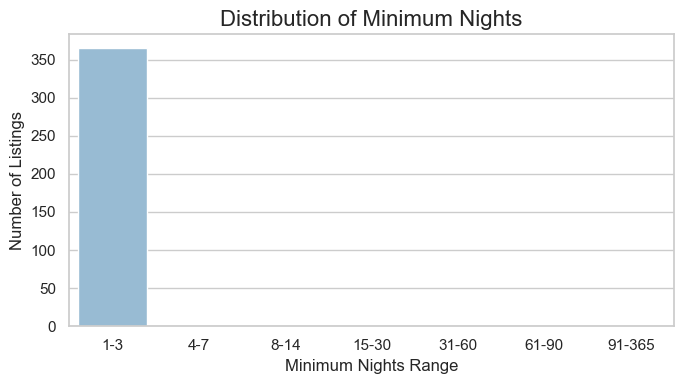

In [4585]:
# Binning minimum_nights jadi kategori agar lebih rapi
bins = [0, 3, 7, 14, 30, 60, 90, 365]
labels = ['1-3', '4-7', '8-14', '15-30', '31-60', '61-90', '91-365']
cheap_high_demand_long_stay['min_nights_bin'] = pd.cut(
    cheap_high_demand_long_stay['minimum_nights'], bins=bins, labels=labels
)

# Hitung jumlah listing per kategori
min_night_counts = cheap_high_demand_long_stay['min_nights_bin'].value_counts().sort_index()

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(x=min_night_counts.index, y=min_night_counts.values, palette="Blues_d")
plt.title('Distribution of Minimum Nights', fontsize=16)
plt.xlabel('Minimum Nights Range', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.tight_layout()
plt.show()

Dari data di atas jumlah minimum nights semua property hanya 1 malam yang berarti bisa menarik banyak pengunjung. Aspek minimum nights rendah menjadi faktor terbesar di segmen ini yang sangat berpengaruh pada penarikan konsumen. Tetapi, Hal ini bisa menyebabkan potential lost karena kemungkinan besar underpricing, seharusnya host dapat menaikkan harga sedikit tanpa menurunkan okupansi. Potensi host revenue improvement & komisi tambahan untuk Airbnb jika dimonetisasi lebih baik.

In [4605]:
# Inisialisasi peta Bangkok
bangkok_center = [13.7563, 100.5018]
map_cheap_high_demand = folium.Map(location=bangkok_center, tiles = 'CartoDB.Voyager', zoom_start=11)

# Ambil neighbourhood unik dan buat warna
neighbourhoods = cheap_high_demand_long_stay['neighbourhood'].unique()
palette = sns.color_palette("husl", len(neighbourhoods)).as_hex()
color_map = dict(zip(neighbourhoods, palette))

# Plot listing berdasarkan lokasi
for _, row in cheap_high_demand_long_stay.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color=color_map.get(row['neighbourhood'], '#3186cc'),
        fill=True,
        fill_opacity=0.6
    ).add_to(map_cheap_high_demand)

map_cheap_high_demand

Mari kita hitung berapa estimasi Potential Lost dan ROI relatif untuk listings di harga murah tetapi tingkat okupansi rendah. 

In [4540]:
# Rata-rata harga listing serupa di neighborhood yang sama
neigh_price_benchmark = df_filtered[df_filtered['occupancy_potential'] >= 0.7].groupby('neighbourhood')['price'].mean().reset_index()
neigh_price_benchmark.rename(columns={'price': 'avg_price_in_neigh'}, inplace=True)

# Gabungkan ke dataframe segmen 2
high_occupancy_low_price = cheap_high_demand.merge(neigh_price_benchmark, on='neighbourhood', how='left')

# Hitung selisih harga relatif
high_occupancy_low_price['price_gap_percent'] = (
    (high_occupancy_low_price['avg_price_in_neigh'] - high_occupancy_low_price['price']) /
    high_occupancy_low_price['avg_price_in_neigh']
) * 100
high_occupancy_low_price['price_gap_percent'] = high_occupancy_low_price['price_gap_percent'].round(2)
high_occupancy_low_price['avg_price_in_neigh'] = high_occupancy_low_price['avg_price_in_neigh'].round(2)
high_occupancy_low_price

id                                             name  \
0              28856089                   Must be The Place (6-bunk bed)   
1              29579782  Stay Monomer, the ideal location (12 Female) 02   
2              30296684        Queen size bed - Mixed  - China town, BKK   
3              30359984  400Baht/Night | Free WIFI | Superking Size Bed.   
4              32970120                 Myhostel Ratchada มายโฮสเทลรัชดา   
..                  ...                                              ...   
360            14256162               Double bed, Free WiFi,1min walk to   
361            30299504       Lovely sweet room @Bussaba condo home near   
362            30168700                         includes, 120m/1min to .   
363            42657537  Designer service apartment Lat Phrao Bangkapi 3   
364  752032538650568338                 120m/1min to , unique and local.   

       host_id          host_name    neighbourhood  latitude  longitude  \
0    217568664  Must Be The Place        Din Daeng  13.79813  100.57061   
1     56782854                Off      Ratchathewi  13.75228  100.53044   
2    190519081            Nissorn   Samphanthawong  13.73236  100.51301   
3    119585590               Yong       Thung khru  13.65256  100.50597   
4    247026527            Suchada       Chatu Chak  13.80504  100.57432   
..         ...                ...              ...       ...        ...   
360   86664827              Annie     Phra Khanong  13.69623  100.60655   
361   20419071           Naraporn         Min Buri  13.78191  100.74918   
362  226646586                Pin       Bang Phlat  13.79348  100.50700   
363  325769559          MingCheng  Wang Thong Lang  13.78201  100.62604   
364  226646586                Pin       Bang Phlat  13.79197  100.50653   

           room_type  price  minimum_nights  ...  reviews_per_month  \
0         Hotel room    350               1  ...                  0   
1        Shared room    400               1  ...                  0   
2        Shared room    350               1  ...                  0   
3       Private room    400               1  ...                  0   
4        Shared room    500               1  ...                  0   
..               ...    ...             ...  ...                ...   
360     Private room    481               1  ...                  1   
361     Private room    450               1  ...                  0   
362     Private room    379               1  ...                  0   
363  Entire home/apt    500               1  ...                  0   
364     Private room    346               1  ...                  1   

    calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                                3               365                      0   
1                               24               365                      0   
2                                5               365                      0   
3                                2               365                      0   
4                                1               365                      0   
..                             ...               ...                    ...   
360                              2               264                     15   
361                              7               262                      6   
362                              2               261                      1   
363                              9               260                      0   
364                              2               259                      1   

     revenue_per_year  price_category  occupancy_potential   facilities  \
0              127750             Low               100.00           AC   
1              146000             Low               100.00  No Facility   
2              127750             Low               100.00  No Facility   
3              146000             Low               100.00    Free Wifi   
4              182500         

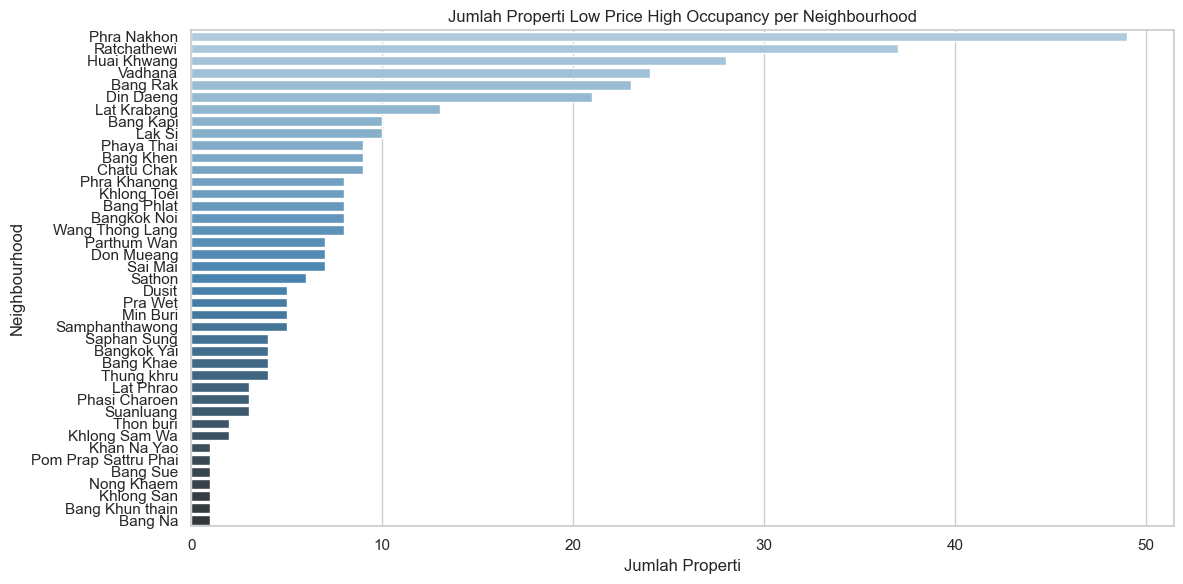

In [4591]:
# Hitung jumlah listing per neighbourhood untuk segmen low_price_high_occupancy
count_per_neighbourhood = high_occupancy_low_price['neighbourhood'].value_counts().reset_index()
count_per_neighbourhood.columns = ['neighbourhood', 'total_listings']
plt.figure(figsize=(12, 6))
sns.barplot(data=count_per_neighbourhood, x='total_listings', y='neighbourhood', palette='Blues_d')
plt.title('Jumlah Properti Low Price High Occupancy per Neighbourhood')
plt.xlabel('Jumlah Properti')
plt.ylabel('Neighbourhood')
plt.tight_layout()
plt.show()

In [4541]:
avg_price_high_occ_low_price = high_occupancy_low_price['price'].mean()
avg_occ_high_occ_low_price = high_occupancy_low_price['occupancy_potential'].mean()

print("\nHigh Occupancy - Low Price:")
print(f"Average Price: {avg_price_high_occ_low_price}")
print(f"Average Occupancy: {avg_occ_high_occ_low_price}")


High Occupancy - Low Price:
Average Price: 415.5342465753425
Average Occupancy: 97.33419178082193


In [4542]:
# Hitung selisih harga (price gap absolut)
high_occupancy_low_price['price_gap'] = high_occupancy_low_price['avg_price_in_neigh'] - high_occupancy_low_price['price']

# Hitung Potential Lost (Revenue)
high_occupancy_low_price['potential_lost_revenue'] = (
    high_occupancy_low_price['price_gap'] *
    high_occupancy_low_price['minimum_nights'] *
    high_occupancy_low_price['occupancy_potential'] *
    365
)

# Estimasi revenue ideal
high_occupancy_low_price['ideal_revenue'] = (
    high_occupancy_low_price['avg_price_in_neigh'] *
    high_occupancy_low_price['minimum_nights'] *
    high_occupancy_low_price['occupancy_potential'] *
    365
)

# Hitung persen potential lost revenue
high_occupancy_low_price['potential_lost_percent'] = (
    high_occupancy_low_price['potential_lost_revenue'] /
    high_occupancy_low_price['ideal_revenue']
) * 100
high_occupancy_low_price['potential_lost_revenue'] = high_occupancy_low_price['potential_lost_revenue'].round(2)
high_occupancy_low_price['potential_lost_percent'] = high_occupancy_low_price['potential_lost_percent'].round(2)
high_occupancy_low_price['ideal_revenue'] = high_occupancy_low_price['ideal_revenue'].round(2)
high_occupancy_low_price['price_gap'] = high_occupancy_low_price['price_gap'].round(2)
display(high_occupancy_low_price[['name', 'neighbourhood', 'price', 'avg_price_in_neigh',
                               'price_gap', 'potential_lost_revenue', 'potential_lost_percent', 'ideal_revenue']])


name    neighbourhood  price  \
0                     Must be The Place (6-bunk bed)        Din Daeng    350   
1    Stay Monomer, the ideal location (12 Female) 02      Ratchathewi    400   
2          Queen size bed - Mixed  - China town, BKK   Samphanthawong    350   
3    400Baht/Night | Free WIFI | Superking Size Bed.       Thung khru    400   
4                   Myhostel Ratchada มายโฮสเทลรัชดา       Chatu Chak    500   
..                                               ...              ...    ...   
360               Double bed, Free WiFi,1min walk to     Phra Khanong    481   
361       Lovely sweet room @Bussaba condo home near         Min Buri    450   
362                         includes, 120m/1min to .       Bang Phlat    379   
363  Designer service apartment Lat Phrao Bangkapi 3  Wang Thong Lang    500   
364                 120m/1min to , unique and local.       Bang Phlat    346   

     avg_price_in_neigh  price_gap  potential_lost_revenue  \
0               1719.85    1369.85             49999525.00   
1               1957.32    1557.32             56842180.00   
2               2337.93    1987.93             72559445.00   
3               1696.42    1296.42             47319330.00   
4               1677.77    1177.77             42988605.00   
..                  ...        ...                     ...   
360             1482.35    1001.35             26436090.61   
361             1416.32     966.32             25317294.10   
362             1758.58    1379.58             36008624.52   
363             1509.06    1009.06             26234500.49   
364             1758.58    1412.58             36586387.03   

     potential_lost_percent  ideal_revenue  
0                     79.65    62774525.00  
1                     79.56    71442180.00  
2                     85.03    85334445.00  
3                     76.42    61919330.00  
4                     70.20    61238605.00  
..                      ...            ...  
360                   67.55    39134707.06  
361                   68.23    37107159.10  
362                   78.45    45900960.37  
363                   66.87    39233975.49  
364                   80.33    45547925.43  

[365 rows x 8 columns]

Potential lost revenue itu bukan kerugian dalam arti minus, tapi opportunity cost — pendapatan yang seharusnya bisa didapat kalau host menaikkan harga sedikit. Dihitungnya dari price gap untuk melihat seberapa besar keuntungan yang harusnya bisa di dapat, semakin besar gap nya semakin rugi host dan Airbnb.  

Bedanya sama ideal revenue adalah keuntungan maksimal yang bisa di dapat ketika harga listing setara dengan harga rata-rata di wilayah yang sama.

In [4543]:
# Hitung rata-rata potential lost dalam persen
average_potential_lost_percent = high_occupancy_low_price['potential_lost_percent'].mean()
print(f"Rata-rata Potential Lost (Persentase): {average_potential_lost_percent:.2f}%")

Rata-rata Potential Lost (Persentase): 77.14%


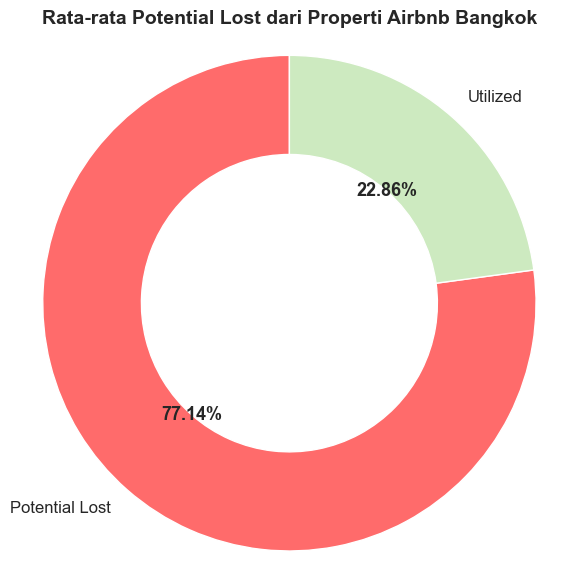

In [4596]:
# Data
lost = 77.14
remaining = 100 - lost
values = [lost, remaining]
labels = ['Potential Lost', 'Utilized']
colors = ['#FF6B6B', '#CDEAC0']  # Merah & hijau muda

# Plot donut chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4},  # Membuat donut
    textprops={'fontsize': 12}
)

# Judul dan gaya
ax.set_title('Rata-rata Potential Lost dari Properti Airbnb Bangkok', fontsize=14, fontweight='bold')
plt.setp(autotexts, size=13, weight='bold')
ax.axis('equal')  # Membuat lingkaran sempurna

plt.tight_layout()
plt.show()

In [4604]:
# Estimasi revenue tahunan
high_occupancy_low_price['estimated_revenue'] = (
    high_occupancy_low_price['price'] *
    (high_occupancy_low_price['occupancy_potential'] /100) * 
    365
)

# Saya asumsikan misalnya 100000 THB per listing untuk biaya investasi
high_occupancy_low_price['investment_cost'] = 1000000  # ← ganti sesuai asumsi

# Hitung ROI
high_occupancy_low_price['roi_percent'] = (
    high_occupancy_low_price['estimated_revenue'] /
    high_occupancy_low_price['investment_cost']
) * 100
high_occupancy_low_price['roi_percent'] = high_occupancy_low_price['roi_percent'].round(2)
display(high_occupancy_low_price[['name', 'neighbourhood', 'price', 'estimated_revenue', 'roi_percent']])


name    neighbourhood  price  \
0                     Must be The Place (6-bunk bed)        Din Daeng    350   
1    Stay Monomer, the ideal location (12 Female) 02      Ratchathewi    400   
2          Queen size bed - Mixed  - China town, BKK   Samphanthawong    350   
3    400Baht/Night | Free WIFI | Superking Size Bed.       Thung khru    400   
4                   Myhostel Ratchada มายโฮสเทลรัชดา       Chatu Chak    500   
..                                               ...              ...    ...   
360               Double bed, Free WiFi,1min walk to     Phra Khanong    481   
361       Lovely sweet room @Bussaba condo home near         Min Buri    450   
362                         includes, 120m/1min to .       Bang Phlat    379   
363  Designer service apartment Lat Phrao Bangkapi 3  Wang Thong Lang    500   
364                 120m/1min to , unique and local.       Bang Phlat    346   

     estimated_revenue  roi_percent  
0          127750.0000        12.78  
1          146000.0000        14.60  
2          127750.0000        12.78  
3          146000.0000        14.60  
4          182500.0000        18.25  
..                 ...          ...  
360        126986.1645        12.70  
361        117898.6500        11.79  
362         98923.3585         9.89  
363        129994.7500        13.00  
364         89615.3840         8.96  

[365 rows x 5 columns]

In [4545]:
# Hitung rata-rata return of investment dalam persen
average_roi_percent = high_occupancy_low_price['roi_percent'].mean()
print(f"Rata-rata ROI (Persentase): {average_roi_percent:.2f}%")

Rata-rata ROI (Persentase): 14.77%


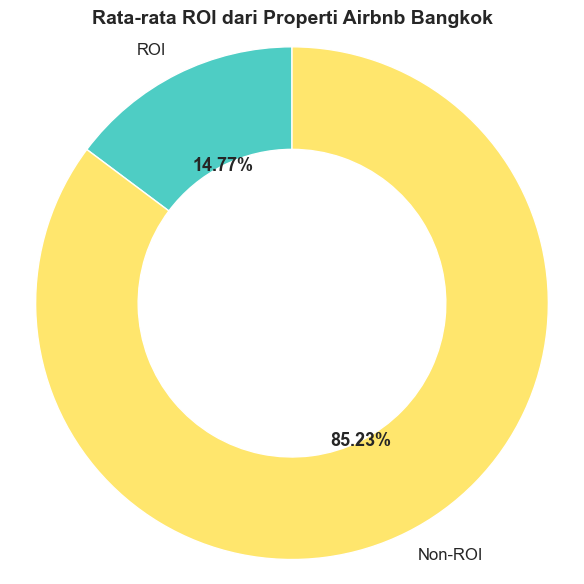

In [4595]:
# Data
roi = 14.77
non_roi = 100 - roi
values = [roi, non_roi]
labels = ['ROI', 'Non-ROI']
colors = ['#4ECDC4', '#FFE66D']  # Biru kehijauan & kuning lembut

# Plot donut chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4},
    textprops={'fontsize': 12}
)

# Judul dan styling
ax.set_title('Rata-rata ROI dari Properti Airbnb Bangkok', fontsize=14, fontweight='bold')
plt.setp(autotexts, size=13, weight='bold')
ax.axis('equal')

plt.tight_layout()
plt.show()

Insight dari Segmen 2: Properti Laris Tapi Harga Terlalu Murah  
1. Tingginya Potential Lost (77.14%)
* Artinya, pemilik properti kehilangan sekitar 3/4 dari potensi pendapatannya karena memasang harga terlalu rendah.
* Ini terjadi meskipun okupansi tinggi (laris) — artinya, pasar sebenarnya mau bayar lebih, tapi tidak dimanfaatkan oleh pemilik.  

2. ROI Relatif Masih Positif (14.77%)
* Dengan asumsi investasi sebesar 1 juta THB, pemilik masih mendapatkan laba sekitar 14.77% per tahun, yang cukup sehat.
* Tapi ROI ini bisa ditingkatkan jauh lebih tinggi jika pricing lebih optimal.

In [ ]:
# Hitung rata-rata Potential Lost (%) per neighbourhood
summary_segment2 = high_occupancy_low_price.groupby('neighbourhood').agg({
    'price': 'mean',
    'occupancy_potential': 'mean',
    'potential_lost_percent': 'mean',
    'roi_percent': 'mean',
    'name': 'count'
}).reset_index()

# Rename kolom
summary_segment2.rename(columns={
    'price': 'avg_price',
    'occupancy_potential': 'avg_occ_potential',
    'potential_lost_percent': 'avg_potential_lost_percent',
    'roi_percent': 'avg_roi_percent',
    'name': 'total_listings'
}, inplace=True)

# Round 2 angka belakang koma
summary_segment2['avg_price'] = summary_segment2['avg_price'].round(2)
summary_segment2['avg_occ_potential'] = summary_segment2['avg_occ_potential'].round(2)
summary_segment2['avg_potential_lost_percent'] = summary_segment2['avg_potential_lost_percent'].round(2)
summary_segment2['avg_roi_percent'] = summary_segment2['avg_roi_percent'].round(2)
display(summary_segment2)

neighbourhood  avg_price  avg_occ_potential  \
0              Bang Kapi     446.30              96.85   
1              Bang Khae     447.50              99.38   
2              Bang Khen     451.89              99.64   
3        Bang Khun thain     500.00             100.00   
4                Bang Na     449.00              95.34   
5             Bang Phlat     424.38              92.40   
6               Bang Rak     395.04              93.66   
7               Bang Sue     500.00             100.00   
8            Bangkok Noi     455.50              97.30   
9            Bangkok Yai     437.50              99.25   
10            Chatu Chak     435.44              96.83   
11             Din Daeng     388.76              98.32   
12            Don Mueang     465.00              99.02   
13                 Dusit     415.60              96.99   
14           Huai Khwang     379.07              99.86   
15           Khan Na Yao     450.00              99.73   
16         Khlong Sam Wa     373.50             100.00   
17            Khlong San     350.00             100.00   
18           Khlong Toei     393.00              98.18   
19                Lak Si     447.50              99.95   
20           Lat Krabang     387.69              99.94   
21             Lat Phrao     498.00             100.00   
22              Min Buri     470.00              92.00   
23            Nong Khaem     450.00              99.73   
24           Parthum Wan     420.14              99.02   
25         Phasi Charoen     373.00              98.08   
26            Phaya Thai     428.56              99.88   
27          Phra Khanong     371.62              87.16   
28           Phra Nakhon     409.88              95.95   
29  Pom Prap Sattru Phai     400.00              99.73   
30               Pra Wet     391.40              99.62   
31           Ratchathewi     437.92              98.88   
32               Sai Mai     446.43              99.96   
33        Samphanthawong     395.20              99.95   
34           Saphan Sung     355.75              99.11   
35                Sathon     399.50              99.45   
36             Suanluang     349.67              94.52   
37             Thon buri     492.00              99.04   
38            Thung khru     399.75              99.86   
39               Vadhana     412.62              95.92   
40       Wang Thong Lang     438.25              91.10   

    avg_potential_lost_percent  avg_roi_percent  total_listings  
0                        68.73            15.79              10  
1                        75.06            16.23               4  
2                        67.10            16.44               9  
3                        86.32            18.25               1  
4                        75.96            15.62               1  
5                        75.87            14.48               8  
6                        85.80            13.55              23  
7                        61.71            18.25               1  
8                        79.36            16.13               8  
9                        80.14            15.84               4  
10                       74.05            15.44               9  
11                       77.40            13.92              21  
12                       63.46            16.80               7  
13                       78.99            14.68               5  
14                       81.23            13.82              28  
15                       72.38            16.38               1  
16                       85.18            13.64               2  
17                       82.20            12.78               1  
18                       84.23            14.07               8  
19                       59.05            16.32              10  
20                       70.68            14.15              13  
21                       85.52            18.18               3  
22                       66.82            15.84         

In [4547]:
def classify_risk(row):
    if row['potential_lost_percent'] > 70:
        return 'Red'
    elif row['potential_lost_percent'] > 40:
        return 'Yellow'
    else:
        return 'Green'

high_occupancy_low_price['risk_zone'] = high_occupancy_low_price.apply(classify_risk, axis=1)

risk_summary = high_occupancy_low_price.groupby(['neighbourhood', 'risk_zone']).agg({
    'potential_lost_percent': 'mean',
    'roi_percent': 'mean',
    'name': 'count'
}).reset_index().rename(columns={'name': 'total_listings'})
risk_summary['potential_lost_percent'] = risk_summary['potential_lost_percent'].round(2)
risk_summary['roi_percent'] = risk_summary['roi_percent'].round(2)
risk_summary

neighbourhood risk_zone  potential_lost_percent  roi_percent  \
0              Bang Kapi       Red                   72.19        13.84   
1              Bang Kapi    Yellow                   66.43        17.09   
2              Bang Khae       Red                   75.06        16.23   
3              Bang Khen       Red                   70.88        14.40   
4              Bang Khen    Yellow                   66.02        17.02   
5        Bang Khun thain       Red                   86.32        18.25   
6                Bang Na       Red                   75.96        15.62   
7             Bang Phlat       Red                   75.87        14.48   
8               Bang Rak       Red                   85.80        13.55   
9               Bang Sue    Yellow                   61.71        18.25   
10           Bangkok Noi       Red                   79.36        16.13   
11           Bangkok Yai       Red                   80.14        15.84   
12            Chatu Chak       Red                   74.05        15.44   
13             Din Daeng       Red                   77.40        13.92   
14            Don Mueang    Yellow                   63.46        16.80   
15                 Dusit       Red                   78.99        14.68   
16           Huai Khwang       Red                   81.23        13.82   
17           Khan Na Yao       Red                   72.38        16.38   
18         Khlong Sam Wa       Red                   85.18        13.64   
19            Khlong San       Red                   82.20        12.78   
20           Khlong Toei       Red                   84.23        14.07   
21                Lak Si    Yellow                   59.05        16.32   
22           Lat Krabang       Red                   70.76        14.11   
23           Lat Krabang    Yellow                   69.75        14.56   
24             Lat Phrao       Red                   85.52        18.18   
25              Min Buri    Yellow                   66.82        15.84   
26            Nong Khaem    Yellow                   62.66        16.38   
27           Parthum Wan       Red                   87.69        15.16   
28         Phasi Charoen       Red                   77.39        11.20   
29         Phasi Charoen    Yellow                   64.77        17.84   
30            Phaya Thai       Red                   75.76        15.62   
31          Phra Khanong       Red                   75.99        11.62   
32          Phra Khanong    Yellow                   67.55        12.70   
33           Phra Nakhon       Red                   75.98        14.40   
34  Pom Prap Sattru Phai       Red                   84.86        14.56   
35               Pra Wet       Red                   72.49        13.74   
36               Pra Wet    Yellow                   67.14        16.20   
37           Ratchathewi       Red                   77.62        15.81   
38               Sai Mai       Red                   75.04        16.29   
39        Samphanthawong       Red                   83.09        14.42   
40           Saphan Sung       Red                   84.47        12.86   
41                Sathon       Red                   79.74        14.51   
42             Suanluang       Red                   81.16        11.78   
43             Thon buri       Red                   70.54        17.78   
44            Thung khru       Red                   76.44        14.57   
45               Vadhana       Red                   86.22        14.41   
46       Wang Thong Lang       Red                   76.90        11.61   
47       Wang Thong Lang    Yellow                   67.40        16.33   

    total_listings  
0                4  
1                6  
2                4  
3                2  
4                7  
5                1  
6                1  
7                8  
8               23  
9                1  
10               8  
11               4  
12               9  
13              21  
14               7  

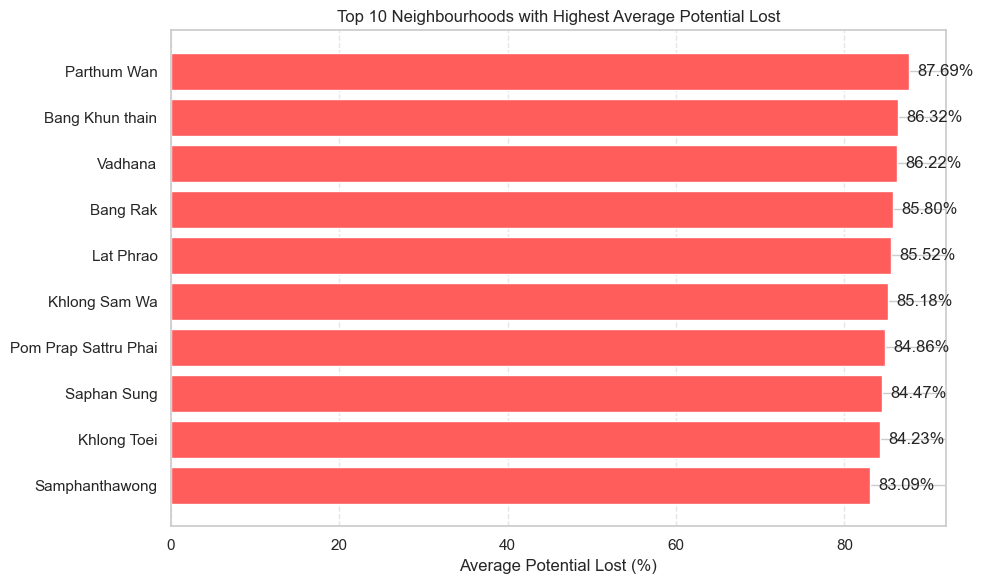

In [4630]:
import matplotlib.pyplot as plt

# Tentukan risk zone
def classify_risk(potential_lost):
    if potential_lost >= 70:
        return 'Red'
    elif potential_lost >= 40:
        return 'Yellow'
    else:
        return 'Green'

# Tambahkan kolom zona risiko
summary_segment2['risk_zone'] = summary_segment2['avg_potential_lost_percent'].apply(classify_risk)

# Ambil top 10 neighbourhood dengan potential lost tertinggi
top10 = summary_segment2.sort_values(by='avg_potential_lost_percent', ascending=False).head(10)

# Warna berdasarkan zona risiko
color_map = {'Red': '#FF5C5C', 'Yellow': '#FFD700', 'Green': '#90EE90'}
top10['bar_color'] = top10['risk_zone'].map(color_map)

# Buat bar chart horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(
    y=top10['neighbourhood'],
    width=top10['avg_potential_lost_percent'],
    color=top10['bar_color']
)

# Tambahkan teks persen di ujung bar
for bar, value in zip(bars, top10['avg_potential_lost_percent']):
    plt.text(value + 1, bar.get_y() + bar.get_height()/2,
             f'{value:.2f}%', va='center')

plt.xlabel('Average Potential Lost (%)')
plt.title('Top 10 Neighbourhoods with Highest Average Potential Lost')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top Insights dari Visualisasi:
1. Dominasi Zona Merah (Risk Zone: Red)
* Mayoritas neighbourhood termasuk dalam zona merah, yaitu dengan potential lost revenue > 70%.
* Hal ini menandakan ketimpangan besar antara revenue aktual dan revenue ideal berdasarkan tingkat hunian.
* Ini menunjukkan bahwa harga listing saat ini terlalu rendah dibandingkan dengan potensi maksimumnya.

2. Neighbourhood dengan Risiko Kehilangan Pendapatan Tertinggi:
* Parthum Wan (87.69%), Bang Khun Thian (86.32%), dan Vadhana (86.22%) memiliki average potential lost tertinggi.
* Jika listing di sini menaikkan harga dengan strategi yang tepat, mereka bisa secara signifikan meningkatkan ROI.

3. Zona Kuning Muncul di Bawah
* Neighborhood seperti Lak Si (59.05%), Bang Sue (61.71%), dan Nong Khaem (62.66%) sudah mulai masuk ke zona kuning, yang artinya mereka lebih optimal dibandingkan zona merah.
* Namun, potential lost tetap tinggi, artinya masih ada ruang perbaikan pricing.

### **Segment 3** - Membandingkan properti mahal yang tetap laris

In [4608]:
# Filter properti dengan harga lebih tinggi dari rata-rata neighbourhood & occupancy tinggi (>50%)
high_price_high_occupancy = df_filtered[
    (df_filtered['price'] > 0) & 
    (df_filtered['price_category'] == 'High') &
    (df_filtered['occupancy_potential'] > 70) 
]

high_price_high_occupancy = high_price_high_occupancy.sort_values(by='availability_365', ascending=False)

# Menampilkan hanya kolom relevan
display(high_price_high_occupancy[['name', 'price', 'price_category', 'occupancy_potential', 'availability_365']])

name  price price_category  \
8860      Family room 4 Beds in Tropical Summer Hostel   1312           High   
8057                             Niamh M Perkins house   3046           High   
8135                                        บ้านอบอุ่น   1500           High   
8133                              Nasa Vegas Apartment   5000           High   
8114                     The first house did you house   3426           High   
...                                                ...    ...            ...   
14576            2 Big beds&Nice pool,  Asok,Sukhumvit   1780           High   
13710               POP Heritage Residence One Bed 107   1414           High   
3102           Big room! closed to Nana  special price   1350           High   
15728       1br/Free pool&gym/WIFI-Asok/Sukhumvit! 2PP   2514           High   
2329   Divisible Cosy 1Bedroom 5min walk to  (NETFLIX)   1207           High   

       occupancy_potential  availability_365  
8860                100.00               365  
8057                100.00               365  
8135                100.00               365  
8133                100.00               365  
8114                100.00               365  
...                    ...               ...  
14576                70.96               259  
13710                70.96               259  
3102                 70.68               258  
15728                70.41               257  
2329                 70.41               257  

[3060 rows x 5 columns]

In [4609]:
# Hapus duplikat langsung dari high_price_high_occupancy
high_price_high_occupancy = high_price_high_occupancy.drop_duplicates(subset=['name', 'neighbourhood'])
display(high_price_high_occupancy[['name', 'neighbourhood']])

name neighbourhood
8860      Family room 4 Beds in Tropical Summer Hostel        Sathon
8057                             Niamh M Perkins house      Bang Rak
8135                                        บ้านอบอุ่น   Khan Na Yao
8133                              Nasa Vegas Apartment     Suanluang
8114                     The first house did you house       Vadhana
...                                                ...           ...
14576            2 Big beds&Nice pool,  Asok,Sukhumvit   Khlong Toei
13710               POP Heritage Residence One Bed 107   Parthum Wan
3102           Big room! closed to Nana  special price   Khlong Toei
15728       1br/Free pool&gym/WIFI-Asok/Sukhumvit! 2PP   Khlong Toei
2329   Divisible Cosy 1Bedroom 5min walk to  (NETFLIX)   Khlong Toei

[2760 rows x 2 columns]

In [4610]:
high_price_high_occupancy['facilities'] = high_price_high_occupancy['facilities'].fillna('No Facility')
high_price_high_occupancy = high_price_high_occupancy.sort_values(by='occupancy_potential', ascending=False)
display(high_price_high_occupancy[['neighbourhood','name', 'facilities', 'occupancy_potential']])

neighbourhood                                             name  \
8860         Sathon     Family room 4 Beds in Tropical Summer Hostel   
13039   Khlong Toei               Brand New Studio Near  Sirikit (5)   
13020       Vadhana                                      曼谷輝煌豪華酒店式公寓   
13010    Khlong San                             Superior Triple Room   
13006   Khlong Toei               Brand New Studio Near  Sirikit (3)   
...             ...                                              ...   
14576   Khlong Toei            2 Big beds&Nice pool,  Asok,Sukhumvit   
13710   Parthum Wan               POP Heritage Residence One Bed 107   
3102    Khlong Toei          Big room! closed to Nana  special price   
15728   Khlong Toei       1br/Free pool&gym/WIFI-Asok/Sukhumvit! 2PP   
2329    Khlong Toei  Divisible Cosy 1Bedroom 5min walk to  (NETFLIX)   

           facilities  occupancy_potential  
8860      No Facility               100.00  
13039             MRT               100.00  
13020     No Facility               100.00  
13010     No Facility               100.00  
13006             MRT               100.00  
...               ...                  ...  
14576       Pool, BTS                70.96  
13710     No Facility                70.96  
3102              BTS                70.68  
15728  Pool, Gym, BTS                70.41  
2329     BTS, Netflix                70.41  

[2760 rows x 4 columns]

Jika dilihat dari jumlah listings setelah drop duplicate terdapat sebanyak 2.760 properti yang disewakan dengan harga mahal dan banyak yang menyewa, jumlah ini lebih banyak daripada segmen 1 hanya 322 listings dan segmen 2 hanya 365 listings.  

Kenapa Segmen 3 Bisa Laris Meski Mahal?
1. Target Market yang Spesifik & Mampu Bayar  
Banyak properti di segmen ini menyasar:
    * Wisatawan asing dengan daya beli tinggi
    * Ekspatriat jangka pendek
    * Keluarga besar atau grup yang butuh kenyamanan dan fasilitas lengkap

In [4611]:
# Step 1: Hitung rata-rata harga di tiap neighbourhood (hanya listing dengan occupancy_potential >= 0.7)
avg_price_in_area = df_filtered[df_filtered['occupancy_potential'] >= 0.7].groupby('neighbourhood')['price'].mean().reset_index()
avg_price_in_area.rename(columns={'price': 'area_avg_price'}, inplace=True)

# Step 2: Drop kolom area_avg_price sebelumnya kalau sudah ada
high_price_high_occupancy = high_price_high_occupancy.drop(columns=['area_avg_price'], errors='ignore')

# Step 3: Merge ulang dengan bersih
high_price_high_occupancy = high_price_high_occupancy.merge(avg_price_in_area, on='neighbourhood', how='left')

# Step 4: Hitung selisih harga
high_price_high_occupancy['price_different'] = high_price_high_occupancy['area_avg_price'] - high_price_high_occupancy['price']
high_price_high_occupancy['area_avg_price'] = high_price_high_occupancy['area_avg_price'].round(2)
high_price_high_occupancy['price_different'] = high_price_high_occupancy['price_different'].round(2)

# Lihat hasil
display(high_price_high_occupancy[['name', 'neighbourhood', 'price', 'area_avg_price', 'price_different']])

name neighbourhood  price  \
0        Family room 4 Beds in Tropical Summer Hostel        Sathon   1312   
1                  Brand New Studio Near  Sirikit (5)   Khlong Toei   1144   
2                                         曼谷輝煌豪華酒店式公寓       Vadhana   4000   
3                                Superior Triple Room    Khlong San   2343   
4                  Brand New Studio Near  Sirikit (3)   Khlong Toei   1414   
...                                               ...           ...    ...   
2755            2 Big beds&Nice pool,  Asok,Sukhumvit   Khlong Toei   1780   
2756               POP Heritage Residence One Bed 107   Parthum Wan   1414   
2757          Big room! closed to Nana  special price   Khlong Toei   1350   
2758       1br/Free pool&gym/WIFI-Asok/Sukhumvit! 2PP   Khlong Toei   2514   
2759  Divisible Cosy 1Bedroom 5min walk to  (NETFLIX)   Khlong Toei   1207   

      area_avg_price  price_different  
0            1972.21           660.21  
1            2492.52          1348.52  
2            2993.82         -1006.18  
3            1966.08          -376.92  
4            2492.52          1078.52  
...              ...              ...  
2755         2492.52           712.52  
2756         3412.54          1998.54  
2757         2492.52          1142.52  
2758         2492.52           -21.48  
2759         2492.52          1285.52  

[2760 rows x 5 columns]

In [4612]:
# Properti dengan perbedaan harga tertinggi
max_diff_price_property = high_price_high_occupancy.loc[high_price_high_occupancy['price_different'].idxmax()]

# Properti dengan perbedaan harga terendah
min_diff_price_property = high_price_high_occupancy.loc[high_price_high_occupancy['price_different'].idxmin()]

# Menampilkan hasil
display(max_diff_price_property[['id','name', 'facilities', 'price', 'price_different', 'occupancy_potential', 'number_of_reviews', 'availability_365', 'room_type', 'minimum_nights']])
display(min_diff_price_property[['id','name', 'facilities', 'price', 'price_different', 'occupancy_potential', 'number_of_reviews', 'availability_365', 'room_type', 'minimum_nights']])

id                     717100189158163926
name                          myCosybyJPM
facilities                    No Facility
price                                1004
price_different                   2435.73
occupancy_potential                 100.0
number_of_reviews                       0
availability_365                      365
room_type                    Private room
minimum_nights                          1
Name: 683, dtype: object

id                                   7708975
name                   Modern Apartment near
facilities                       City Center
price                                   5000
price_different                     -3630.75
occupancy_potential                    100.0
number_of_reviews                          0
availability_365                         365
room_type                    Entire home/apt
minimum_nights                             1
Name: 405, dtype: object

1. Insight Sampel 1 – myCosybyJPM :
* Underpriced Listing. Harga properti ini jauh di bawah rata-rata wilayah, padahal okupansinya sangat tinggi.
* Potential Lost: Tinggi. Properti ini bisa mendapatkan pendapatan lebih tinggi jika harga dinaikkan, apalagi karena:
    * Tingkat ketersediaan (availability_365) maksimal
    * Okupansi maksimal
    * Daya tarik pasar terbukti walau tanpa fasilitas

2. Insight Sampel 2 – Modern Apartment near City Center :
* Overpriced Listing. Tapi menariknya, walau jauh lebih mahal dari rata-rata wilayah, okupansi tetap maksimal.
* Potential Lost (Kesempatan): Ada potensi tidak lost dalam revenue, tapi opportunity cost dari tidak ekspansi:
    * Mungkin listing ini terlalu laris karena fasilitas & lokasi premium.
    * Airbnb bisa duplikasi model ini (fasilitas & lokasi) di area serupa.

In [4613]:
# Ambil longitude dan latitude berdasarkan index
property_x = df[df['id'] == 717100189158163926][['name', 'latitude', 'longitude']]
property_y = df[df['id'] == 7708975][['name', 'latitude', 'longitude']]

print(property_x)
print(property_y)

              name  latitude  longitude
14204  myCosybyJPM  13.80452   100.5972
                                   name  latitude  longitude
1161  Modern Apartment near City Center   13.6736  100.64594


In [4614]:
# Data properti dengan lat & long
properties = [
    {"name": "myCosybyJPM", 
     "facilities": "No Facility",
     "price": 1004, 
     "occupancy_potential": 100.0, 
     "latitude": 13.80452, "longitude": 100.5972}, 

    {"name": "Modern Apartment near", 
     "facilities": "City Center",
     "price": 5000, 
     "occupancy_potential": 100.0, 
     "latitude": 13.6736, "longitude": 100.64594}  
]

# Buat peta dengan titik tengah dari properti
map = folium.Map(location=[13.8, 100.55], tiles = 'CartoDB.Voyager', zoom_start=12)
# Tambahkan marker untuk setiap properti
for prop in properties:
    color = "green" if prop["occupancy_potential"] > 0 else "red"  # Warna hijau untuk yang lebih sering dipesan
    folium.Marker(
        location=[prop["latitude"], prop["longitude"]],
        popup=f"{prop['name']}<br>Facilities: {prop['facilities']}<br>Price Diff: {prop['price']}<br>Occupancy: {prop['occupancy_potential']}%",
        icon=folium.Icon(color=color)
    ).add_to(map)
# Tampilkan peta
map

In [4615]:
# Filter properti dengan harga mahal dan okupansi tinggi yang memiliki minimum stay lebih dari 7 malam
high_price_high_occupancy_long_stay = high_price_high_occupancy[
    (high_price_high_occupancy['minimum_nights'] < 7) &
    (high_price_high_occupancy['price'] > 1000) &
    (high_price_high_occupancy['occupancy_potential'] > 70)
]

high_price_high_occupancy = high_price_high_occupancy.sort_values(by='minimum_nights', ascending=True)

# Tampilkan properti dengan harga mahal, okupansi tinggi, dan minimum stay sedikit
display(high_price_high_occupancy_long_stay[['name','price', 'facilities', 'occupancy_potential', 'minimum_nights']])

name  price      facilities  \
0        Family room 4 Beds in Tropical Summer Hostel   1312     No Facility   
1                  Brand New Studio Near  Sirikit (5)   1144             MRT   
2                                         曼谷輝煌豪華酒店式公寓   4000     No Facility   
3                                Superior Triple Room   2343     No Facility   
4                  Brand New Studio Near  Sirikit (3)   1414             MRT   
...                                               ...    ...             ...   
2755            2 Big beds&Nice pool,  Asok,Sukhumvit   1780       Pool, BTS   
2756               POP Heritage Residence One Bed 107   1414     No Facility   
2757          Big room! closed to Nana  special price   1350             BTS   
2758       1br/Free pool&gym/WIFI-Asok/Sukhumvit! 2PP   2514  Pool, Gym, BTS   
2759  Divisible Cosy 1Bedroom 5min walk to  (NETFLIX)   1207    BTS, Netflix   

      occupancy_potential  minimum_nights  
0                  100.00               1  
1                  100.00               1  
2                  100.00               1  
3                  100.00               1  
4                  100.00               1  
...                   ...             ...  
2755                70.96               1  
2756                70.96               1  
2757                70.68               1  
2758                70.41               1  
2759                70.41               1  

[2760 rows x 5 columns]

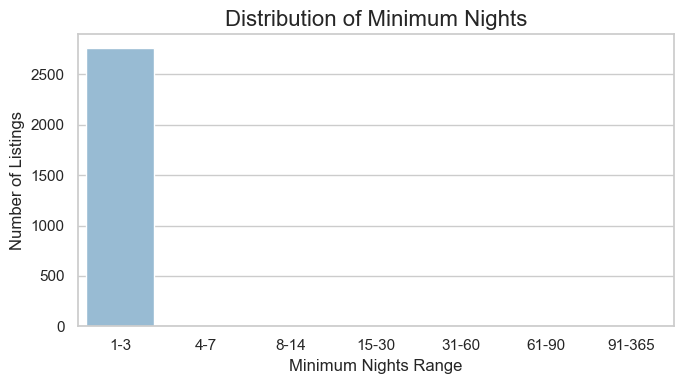

In [4616]:
# Binning minimum_nights jadi kategori agar lebih rapi
bins = [0, 3, 7, 14, 30, 60, 90, 365]
labels = ['1-3', '4-7', '8-14', '15-30', '31-60', '61-90', '91-365']
high_price_high_occupancy_long_stay['min_nights_bin'] = pd.cut(
    high_price_high_occupancy_long_stay['minimum_nights'], bins=bins, labels=labels
)

# Hitung jumlah listing per kategori
min_night_counts = high_price_high_occupancy_long_stay['min_nights_bin'].value_counts().sort_index()

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(x=min_night_counts.index, y=min_night_counts.values, palette="Blues_d")
plt.title('Distribution of Minimum Nights', fontsize=16)
plt.xlabel('Minimum Nights Range', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.tight_layout()
plt.show()

Kenapa Properti dengan Minimum Stay = 1 Tetap Laris di Segmen Mahal?
1. Flexibility is a Selling Point
* Minimum stay = 1 berarti siapa pun bisa booking dengan mudah, bahkan cuma untuk 1 malam.
*  Ini bikin properti fleksibel dan menarik buat:
    * Wisatawan spontan
    * Traveller bisnis
    * Turis yang punya itinerary padat dan sering pindah lokasi
* Properti yang mahal tapi fleksibel justru menang di sisi kemudahan booking!

2. Tamu High Budget Biasanya Short Trip
    * Banyak tamu kaya datang cuma untuk weekend getaway, liburan pendek, atau urusan bisnis → mereka nggak cari long stay, tapi mau nyaman dan mewah.  

Minimum nights = 1 malah jadi nilai jual, bukan kelemahan.
Karena digabung dengan fasilitas premium + lokasi strategis + harga tinggi = revenue besar meskipun tamu hanya short stay.

In [4617]:
# Inisialisasi kolom baru
high_price_high_occupancy['revenue_lost'] = 0
high_price_high_occupancy['opportunity_gain'] = 0

# Kondisi 1: Harga terlalu murah → Opportunity Gain
mask_opportunity = high_price_high_occupancy['price_different'] > 0
high_price_high_occupancy.loc[mask_opportunity, 'opportunity_gain'] = (
    high_price_high_occupancy['price_different'] * 
    (high_price_high_occupancy['occupancy_potential'] / 100) * 
    high_price_high_occupancy['availability_365']
)

# Kondisi 2: Harga terlalu mahal → Revenue Lost
mask_lost = high_price_high_occupancy['price_different'] < 0
high_price_high_occupancy.loc[mask_lost, 'revenue_lost'] = (
    abs(high_price_high_occupancy['price_different']) * 
    (high_price_high_occupancy['occupancy_potential'] / 100) * 
    high_price_high_occupancy['availability_365']
)
high_price_high_occupancy['opportunity_gain'] = high_price_high_occupancy['opportunity_gain'].round(2)
high_price_high_occupancy['revenue_lost'] = high_price_high_occupancy['revenue_lost'].round(2)
# Cek hasilnya
display(high_price_high_occupancy[[
    'name', 'neighbourhood', 'price', 'area_avg_price', 'price_different',
    'occupancy_potential', 'availability_365', 
    'opportunity_gain', 'revenue_lost'
]].sort_values(by='opportunity_gain', ascending=False))


name neighbourhood  price  \
683                                          myCosybyJPM     Lat Phrao   1004   
875   Shared space in commercial complex + subway access   Parthum Wan   1039   
994                                Center BKK near MBK &   Parthum Wan   1100   
1194                                           Ci home 5   Parthum Wan   1100   
1734                 168 Hostel : Best hostel of bangkok   Parthum Wan   1029   
...                                                  ...           ...    ...   
1426        Stylist house 5 min. to Khaosan Road Bangkok   Phra Nakhon   4000   
666      (602)Cozy 1 BR , 10 min walking to  Chong Nonsi        Sathon   2000   
667                               Bluerama - Adults Only     Bang Khae   3211   
1430             Feung Nakorn Room with  in Old town BKK   Phra Nakhon   3545   
1550                      New!  2BR 4ppl/Surasak Sathorn        Sathon   2257   

      area_avg_price  price_different  occupancy_potential  availability_365  \
683          3439.73          2435.73               100.00               365   
875          3412.54          2373.54                99.73               364   
994          3412.54          2312.54                99.73               364   
1194         3412.54          2312.54                99.18               362   
1734         3412.54          2383.54                96.99               354   
...              ...              ...                  ...               ...   
1426         1706.68         -2293.32                98.63               360   
666          1972.21           -27.79               100.00               365   
667          1794.29         -1416.71               100.00               365   
1430         1706.68         -1838.32                98.63               360   
1550         1972.21          -284.79                98.08               358   

      opportunity_gain  revenue_lost  
683          889041.45          0.00  
875          861635.84          0.00  
994          839491.80          0.00  
1194         830274.94          0.00  
1734         818375.59          0.00  
...                ...           ...  
1426              0.00     814284.55  
666               0.00      10143.35  
667               0.00     517099.15  
1430              0.00     652728.61  
1550              0.00      99997.29  

[2760 rows x 9 columns]

In [4618]:
# Hitung rata-rata per neighbourhood
price_avg_3 = high_price_high_occupancy.groupby('neighbourhood')['price'].mean()
occupancy_avg_3 = high_price_high_occupancy.groupby('neighbourhood')['occupancy_potential'].mean()

# Assign ke kolom baru dengan map
high_price_high_occupancy['avg_price'] = high_price_high_occupancy['neighbourhood'].map(price_avg_3)
high_price_high_occupancy['avg_occupancy'] = high_price_high_occupancy['neighbourhood'].map(occupancy_avg_3)

# Bulatkan
high_price_high_occupancy['avg_price'] = high_price_high_occupancy['avg_price'].round(2)
high_price_high_occupancy['avg_occupancy'] = high_price_high_occupancy['avg_occupancy'].round(2)

# Tampilkan hasil
high_price_high_occupancy.sort_values(by='neighbourhood', ascending=False)

id                                           name  \
1708            41944795         403★Nara Suite Residence★2KingBed+会说中文   
1058            25493646  Riverfront Residence Bangkok River view (2BR)   
1233            10185958              Great apartment in great location   
575             34359761       The trust พระราม 3 ห้องมุม วิวสระว่ายน้ำ   
640             19307501                              Baan Nonzee Condo   
...                  ...                                            ...   
494             21475120             Nesuto 2 bunkbeds @ Ramkamhaeng 52   
150   767852173366164842                   Near Suvarnabhumi to Bangkok   
31    636392735465022689     คอนโดน่าอยู่พร้อมมีที่จอดรถฟรีบริเวณที่พัก   
164             41512386                                Nature & Nature   
827             28705837          อพาร์ทเมนต์วันหยุดแสนสบายและสะดวกสบาย   

        host_id   host_name neighbourhood   latitude   longitude  \
1708  132473239   Amb Ville     Yan na wa  13.702940  100.537610   
1058  100104168  Riverfront     Yan na wa  13.673040  100.544660   
1233   35172555       Ruthy     Yan na wa  13.700400  100.537010   
575   257602741     Thipjan     Yan na wa  13.693570  100.536990   
640   135215422  Pornchalat     Yan na wa  13.705610  100.535370   
...         ...         ...           ...        ...         ...   
494    45317116     Ampapan     Bang Kapi  13.760190  100.643080   
150   489056851    Tanudech     Bang Kapi  13.760350  100.638370   
31    174267805      ทัดชัย     Bang Kapi  13.774125  100.640572   
164   230586918     Bamrung      Bang Bon  13.653800  100.363710   
827   216540015       Paris      Bang Bon  13.676800  100.425660   

            room_type  price  minimum_nights  ...  revenue_per_year  \
1708  Entire home/apt   1490               1  ...            528950   
1058     Private room   4726               1  ...           1715538   
1233  Entire home/apt   2944               1  ...           1062784   
575      Private room   3400               1  ...           1241000   
640   Entire home/apt   3000               1  ...           1095000   
...               ...    ...             ...  ...               ...   
494       Shared room   1600               1  ...            584000   
150      Private room   2240               1  ...            817600   
31       Private room   1500               1  ...            547500   
164   Entire home/apt   2000               1  ...            730000   
827      Private room   2632               1  ...            960680   

     price_category  occupancy_potential   facilities  area_avg_price  \
1708           High                97.26      Kitchen         2573.01   
1058           High                99.45   River View         2573.01   
1233           High                98.90  No Facility         2573.01   
575            High               100.00  No Facility         2573.01   
640            High               100.00  No Facility         2573.01   
...             ...                  ...          ...             ...   
494            High               100.00  No Facility         1427.41   
150            High               100.00  No Facility         1427.41   
31             High               100.00  No Facility         1427.41   
164            High               100.00  No Facility         1504.40   
827            High               100.00  No Facility         1504.40   

      price_different  revenue_lost opportunity_gain  avg_price avg_occupancy  
1708          1083.01          0.00        373934.11    2461.12         97.22  
1058         -2152.99     777236.93             0.00    2461.12         97.22  
1233          -370.99     132454.19             0.00    2461.12         97.22  
575           -826.99     301851.35             0.00    2461.12         97.22  
640           -426.99     155851.35             0.00    2461.12         97.22  
...               ...           ...              ...        ...           ...  
494           

* Opportunity Gain  
Definisi:  
Properti yang harganya di bawah rata-rata di area tersebut, padahal okupansi mereka tinggi.
    1. Karena okupansi mereka tinggi, ini menandakan demand-nya kuat, sehingga mereka punya ruang untuk menaikkan harga.
    2. Airbnb bisa memberikan rekomendasi penyesuaian harga otomatis untuk host-host seperti ini agar lebih optimal revenue-nya.

* Revenue Lost  
Definisi:  
Properti yang harganya jauh di atas rata-rata area, namun tetap memiliki okupansi tinggi.
    1. Properti ini bisa menghasilkan revenue tinggi tapi berisiko tidak kompetitif dalam jangka panjang jika supply meningkat.
    2. Beberapa listing mungkin “menjual brand experience” (misalnya properti dengan gaya unik, lokasi spesial, atau fasilitas premium).
    3. Namun, jika properti tersebut tetap dapat pemesanan secara konstan, itu tandanya target market-nya loyal dan willing to pay more.

In [4619]:
# Inisialisasi map di sekitar Bangkok
bangkok_center = [13.7563, 100.5018]
map_neighbourhood = folium.Map(location=bangkok_center, tiles = 'CartoDB.Voyager', zoom_start=11)

# Ambil daftar neighbourhood unik dan assign warna
neighbourhoods = high_price_high_occupancy['neighbourhood'].unique()
palette = sns.color_palette("hsv", len(neighbourhoods)).as_hex()  # Banyak warna
color_map = dict(zip(neighbourhoods, palette))

# Tambahkan marker untuk setiap listing
for _, row in high_price_high_occupancy.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color=color_map[row['neighbourhood']],
        fill=True,
        fill_opacity=0.6
    ).add_to(map_neighbourhood)

map_neighbourhood

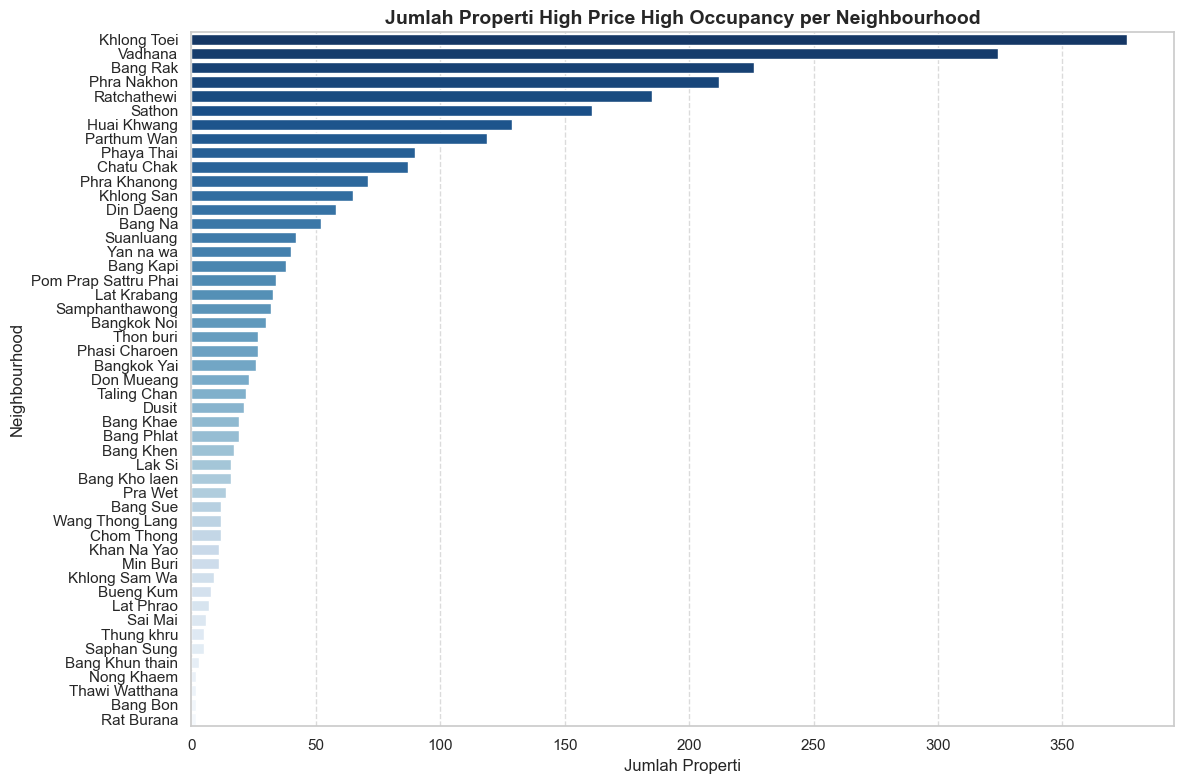

In [4620]:
# Hitung jumlah properti per neighbourhood untuk segmen high_price_high_occupancy
high_count = high_price_high_occupancy['neighbourhood'].value_counts().sort_values(ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=high_count.values, y=high_count.index, palette='Blues_r')

# Styling
plt.title('Jumlah Properti High Price High Occupancy per Neighbourhood', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Properti')
plt.ylabel('Neighbourhood')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

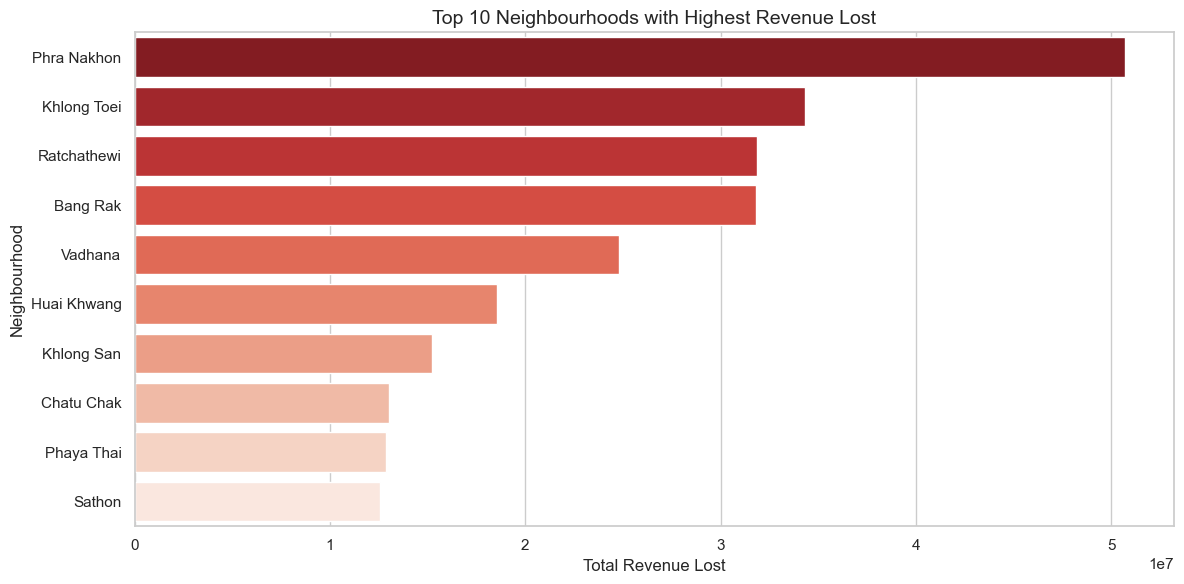

In [4621]:
# 1. Groupby & ambil top 10
top10_revenue_lost = (
    high_price_high_occupancy
    .groupby('neighbourhood')['revenue_lost']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# 2. Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_revenue_lost, x='revenue_lost', y='neighbourhood', palette='Reds_r')

plt.title('Top 10 Neighbourhoods with Highest Revenue Lost', fontsize=14)
plt.xlabel('Total Revenue Lost')
plt.ylabel('Neighbourhood')
plt.tight_layout()
plt.show()

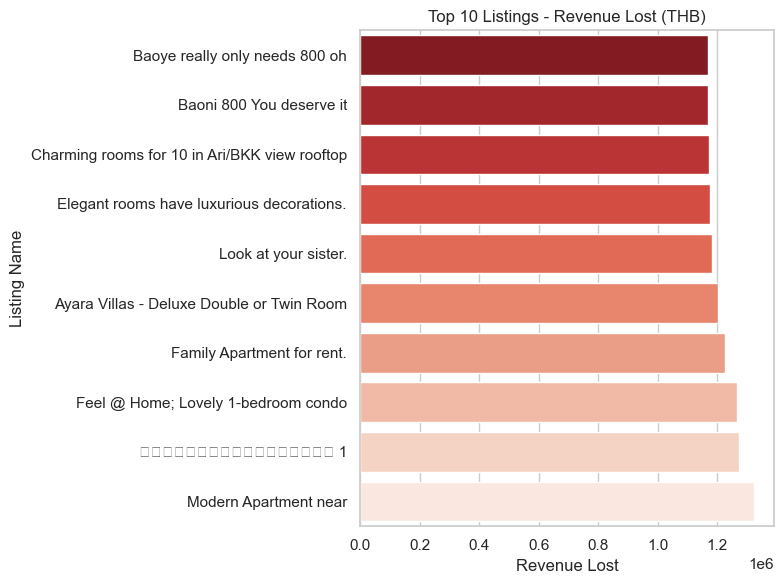

In [4622]:
# Filter listing dengan revenue lost 
revenue_lost_df = high_price_high_occupancy[high_price_high_occupancy['revenue_lost'] >= 0]

# Ambil 10 listing dengan nilai loss terbesar (paling negatif)
top_lost = revenue_lost_df.sort_values(by='revenue_lost').tail(10)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_lost, 
    y='name', 
    x='revenue_lost', 
    palette='Reds_r'
)
plt.title('Top 10 Listings - Revenue Lost (THB)')
plt.xlabel('Revenue Lost')
plt.ylabel('Listing Name')
plt.tight_layout()
plt.show()

In [4623]:
# 1. Hitung rata-rata per neighbourhood
neigh_avg = (
    high_price_high_occupancy
    .groupby('neighbourhood')[['price', 'occupancy_potential']]
    .mean()
    .reset_index()
)

# 2. Rename kolom biar jelas
neigh_avg.rename(columns={
    'price': 'average_price',
    'occupancy_potential': 'average_occupancy'
}, inplace=True)

# 3. Merge ke revenue_lost_df
revenue_lost_df = revenue_lost_df.merge(neigh_avg, on='neighbourhood', how='left')
revenue_lost_df[['average_price', 'average_occupancy']].round(2)
revenue_lost_df

id  \
0               38055053   
1     716814433290447845   
2               27818628   
3               32701111   
4               30605085   
...                  ...   
2755            35222886   
2756            35828067   
2757            27345347   
2758             4639960   
2759            14544859   

                                                         name    host_id  \
0                Family room 4 Beds in Tropical Summer Hostel  269497604   
1              Have a nice day.  I wish you have all the best  461296730   
2                    Nice room close to , Railway &China Town  130701385   
3                                 Ibeyond Romklao 2 Queen bed   47634456   
4          Exceptional location heart of BKK Rachaprasong/4BR   42594121   
...                                                       ...        ...   
2755              Family Room  Acozyposhtel DonMuang  Bangkok  176795569   
2756             Family room 6 Beds in Tropical Summer Hostel  269497604   
2757  500 Meters from  Nana - Superior room exclude breakfast  378180502   
2758                    Sukhumvit,5min walk  Asoke,Terminal21   24021888   
2759          Divisible Cosy 1Bedroom 5min walk to  (NETFLIX)    6128312   

                       host_name neighbourhood   latitude   longitude  \
0                       Tropical        Sathon  13.716520  100.532040   
1                          Chiến       Vadhana  13.724694  100.581476   
2                     Nudchanart      Bang Rak  13.736050  100.516550   
3                       Poompong   Lat Krabang  13.752570  100.749500   
4                           Gift   Parthum Wan  13.744830  100.549320   
...                          ...           ...        ...         ...   
2755                      Suporn    Don Mueang  13.941740  100.612980   
2756                    Tropical        Sathon  13.716180  100.529500   
2757                  Panitchaya       Vadhana  13.742090  100.558700   
2758  Maitria Hotel Sukhumvit 18   Khlong Toei  13.733130  100.562590   
2759                     Taviras   Khlong Toei  13.717390  100.585460   

            room_type  price  minimum_nights  ...  occupancy_potential  \
0        Private room   1312               1  ...               100.00   
1     Entire home/apt   2166               1  ...                96.44   
2          Hotel room   1170               1  ...                96.44   
3        Private room   1090               1  ...                96.44   
4     Entire home/apt   4986               1  ...                96.44   
...               ...    ...             ...  ...                  ...   
2755       Hotel room   1180               1  ...                99.73   
2756     Private room   1863               1  ...                99.73   
2757       Hotel room   2467               1  ...                99.73   
2758     Private room   4871               1  ...                99.73   
2759  Entire home/apt   1207               1  ...                70.41   

              facilities  area_avg_price  price_different  revenue_lost  \
0            No Facility         1972.21           660.21          0.00   
1            No Facility         2993.82           827.82          0.00   
2           station, MRT         2781.50          1611.50          0.00   
3            No Facility         1322.30           232.30          0.00   
4                     AC         3412.54         -1573.46     534140.58   
...                  ...             ...              ...           ...   
2755         AC, Airport         1272.67            92.67          0.00   
2756         No Facility         1972.21           109.21          0.00   
2757      BTS, Breakfast         2993.82           526.82          0.00   
2758  terminal, Skytrain         2492.52         -2378.48     863429.15   
2759        BTS, Netflix         2492.52          1285.52          0.00   

      opportunity_gain  avg_price avg_occupancy  average_price  \
0            240976.65    1767.58      

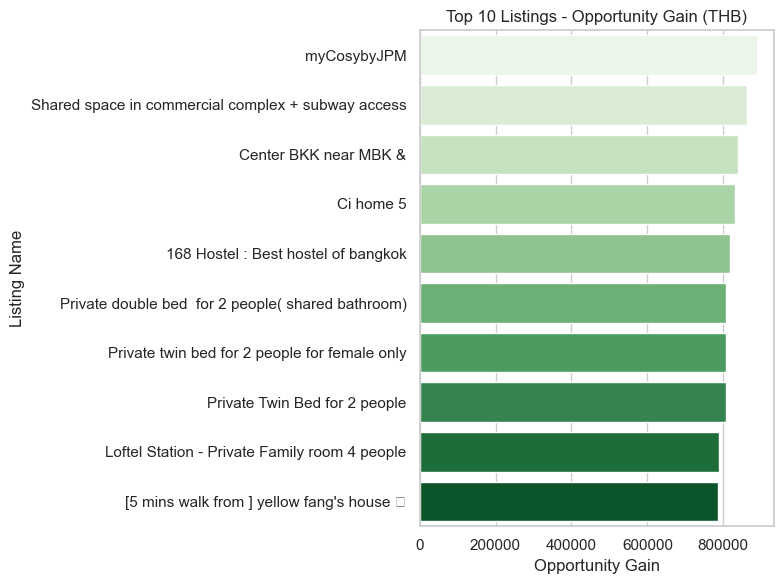

In [4624]:
# Filter listing dengan opportunity gain (opportunity_gain >= 0)
opportunity_gain_df = high_price_high_occupancy[high_price_high_occupancy['opportunity_gain'] >= 0]

# Ambil 10 listing dengan gain tertinggi
top_gain = opportunity_gain_df.sort_values(by='opportunity_gain', ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_gain, 
    y='name', 
    x='opportunity_gain', 
    palette='Greens'
)
plt.title('Top 10 Listings - Opportunity Gain (THB)')
plt.xlabel('Opportunity Gain')
plt.ylabel('Listing Name')
plt.tight_layout()
plt.show()

Kesimpulan Umum:  
Segmen 3 (High Price – High Occupancy) adalah aset penting bagi Airbnb di Bangkok:
* Mereka menunjukkan demand kuat meskipun mahal.
* Tapi juga memperlihatkan kesenjangan strategi harga antar host.

Dengan pemetaan seperti ini, Airbnb bisa:
* Memberikan intervensi personal untuk menaikkan harga listing underperformer (opportunity gain),
* Dan menjaga kualitas premium listing overprice yang tetap laris (revenue lost), agar tetap relevan bagi konsumen.

In [4625]:
# Estimasi revenue per tahun
high_price_high_occupancy['estimated_revenue'] = (
    high_price_high_occupancy['price'] *
    (high_price_high_occupancy['occupancy_potential'] / 100) *
    365
)

# Asumsi biaya investasi
high_price_high_occupancy['investment_cost'] = 1_000_000  # kamu bisa sesuaikan nilai ini

# Hitung ROI
high_price_high_occupancy['roi_percent'] = (
    high_price_high_occupancy['estimated_revenue'] /
    high_price_high_occupancy['investment_cost']
) * 100

# Bulatkan 2 angka di belakang kom
high_price_high_occupancy['roi_percent'] = high_price_high_occupancy['roi_percent'].round(2)
high_price_high_occupancy['estimated_revenue'] = high_price_high_occupancy['estimated_revenue'].round(2)

# Lihat hasil
display(high_price_high_occupancy[['name', 'price', 'occupancy_potential',
                                   'estimated_revenue', 'investment_cost',
                                   'roi_percent', 'revenue_lost', 'opportunity_gain']])


name  price  \
0                Family room 4 Beds in Tropical Summer Hostel   1312   
1835           Have a nice day.  I wish you have all the best   2166   
1836                 Nice room close to , Railway &China Town   1170   
1837                              Ibeyond Romklao 2 Queen bed   1090   
1838       Exceptional location heart of BKK Rachaprasong/4BR   4986   
...                                                       ...    ...   
922               Family Room  Acozyposhtel DonMuang  Bangkok   1180   
923              Family room 6 Beds in Tropical Summer Hostel   1863   
924   500 Meters from  Nana - Superior room exclude breakfast   2467   
916                     Sukhumvit,5min walk  Asoke,Terminal21   4871   
2759          Divisible Cosy 1Bedroom 5min walk to  (NETFLIX)   1207   

      occupancy_potential  estimated_revenue  investment_cost  roi_percent  \
0                  100.00          478880.00          1000000        47.89   
1835                96.44          762445.00          1000000        76.24   
1836                96.44          411847.02          1000000        41.18   
1837                96.44          383686.54          1000000        38.37   
1838                96.44         1755101.92          1000000       175.51   
...                   ...                ...              ...          ...   
922                 99.73          429537.11          1000000        42.95   
923                 99.73          678159.01          1000000        67.82   
924                 99.73          898023.77          1000000        89.80   
916                 99.73         1773114.63          1000000       177.31   
2759                70.41          310194.78          1000000        31.02   

      revenue_lost  opportunity_gain  
0             0.00         240976.65  
1835          0.00         281019.06  
1836          0.00         547053.97  
1837          0.00          78858.60  
1838     534140.58              0.00  
...            ...               ...  
922           0.00          33640.80  
923           0.00          39645.11  
924           0.00         191244.72  
916      863429.15              0.00  
2759          0.00         232619.60  

[2760 rows x 8 columns]

In [4626]:
avg_revenue_lost_thb = high_price_high_occupancy['revenue_lost'].mean()
avg_opportunity_gain_thb = high_price_high_occupancy['opportunity_gain'].mean()
avg_roi = high_price_high_occupancy['roi_percent'].mean()

print(f' Rata-rata Revenue Lost (THB): {avg_revenue_lost_thb:,.2f}')
print(f' Rata-rata Opportunity Gain (THB): {avg_opportunity_gain_thb:,.2f}')
print(f' Rata-rata ROI: {avg_roi:.2f}%')

 Rata-rata Revenue Lost (THB): 139,206.57
 Rata-rata Opportunity Gain (THB): 151,978.09
 Rata-rata ROI: 76.14%


In [4627]:
high_price_high_occupancy['revenue_lost_percent'] = (
    high_price_high_occupancy['revenue_lost'] / high_price_high_occupancy['estimated_revenue']
) * 100

high_price_high_occupancy['opportunity_gain_percent'] = (
    high_price_high_occupancy['opportunity_gain'] / high_price_high_occupancy['estimated_revenue']
) * 100

avg_revenue_lost_percent = high_price_high_occupancy['revenue_lost_percent'].mean()
avg_opportunity_gain_percent = high_price_high_occupancy['opportunity_gain_percent'].mean()
print(f"Rata-rata Revenue Lost (%): {avg_revenue_lost_percent:.2f}%")
print(f"Rata-rata Opportunity Gain (%): {avg_opportunity_gain_percent:.2f}%")

Rata-rata Revenue Lost (%): 11.42%
Rata-rata Opportunity Gain (%): 31.59%


1. Revenue Lost Masih Signifikan ( THB 139,206.57)
Meskipun listing di segmen ini termasuk premium dan ramai peminat (high price & high occupancy), rata-rata revenue lost mencapai lebih dari 139 ribu THB per listing per tahun.
Kemungkinan penyebab:  
    * Harga terlalu tinggi sehingga mengurangi booking potential maksimum.  
    * Minimum stay terlalu panjang atau aturan listing yang terlalu ketat.  
    * Tidak optimal dalam memanfaatkan high demand (terutama saat musim ramai).

2. Masih Ada Peluang Tambahan Pendapatan (Opportunity Gain: THB 151,978.09)
Ini menunjukkan bahwa bahkan di segmen dengan performa baik pun, masih ada ruang untuk peningkatan pendapatan hampir 152 ribu THB per tahun per listing.  
    * Jika strategi harga & ketersediaan dimaksimalkan, Airbnb menduplikasi properti yang sama dari segi performa di wilayah lain yang sama strategisnya sehingga pendapatan bisa meningkat drastis.  
    * Listing bisa diarahkan untuk maximize value without losing occupancy (contoh: seasonal pricing, diskon jangka panjang, dll).

3. ROI Tinggi Tapi Masih Bisa Ditingkatkan (76.14%)
ROI rata-rata sebesar 76.14% menunjukkan bahwa investasi di segmen ini menguntungkan, namun belum optimal.  
    * Jika dibandingkan dengan segmen 1 yang ROI-nya hanya ~14%, ini sangat bagus.  
    * Namun melihat besarnya opportunity gain dan revenue lost, seharusnya ROI bisa menyentuh >100% jika efisiensi ditingkatkan.

### Persentase Persebaran Properti per Segmen

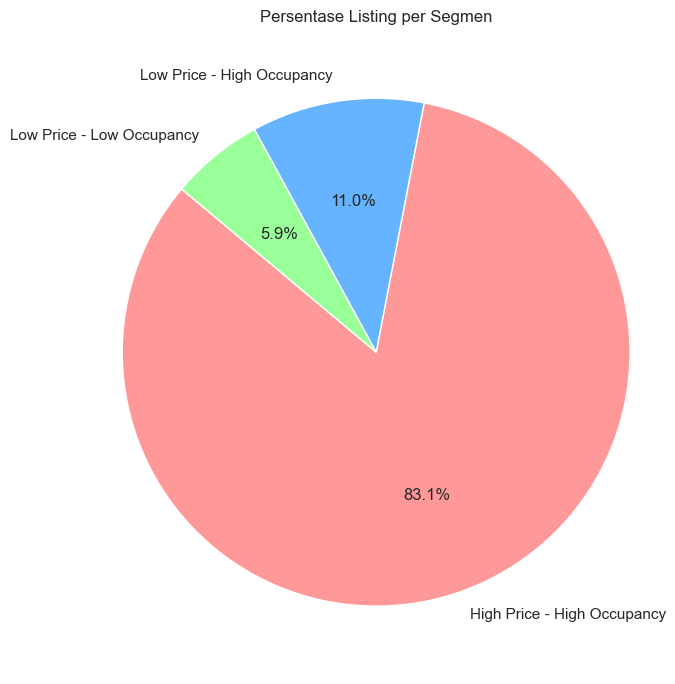

In [4628]:
low_price_low_occupancy_long_stay['segment'] = 'Low Price - Low Occupancy'
high_occupancy_low_price['segment'] = 'Low Price - High Occupancy'
high_price_high_occupancy['segment'] = 'High Price - High Occupancy'

combined_segments_df = pd.concat([
    low_price_low_occupancy_long_stay,
    high_occupancy_low_price,
    high_price_high_occupancy
])

segment_percentages = combined_segments_df['segment'].value_counts(normalize=True) * 100

segment_percentages = (
    combined_segments_df['segment']
    .value_counts(normalize=True)
    .reset_index()
)

segment_percentages.columns = ['Segment', 'Proportion']
segment_percentages['Proportion'] = segment_percentages['Proportion'].round(4)

# Pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.figure(figsize=(7,7))
plt.pie(
    segment_percentages['Proportion'],
    labels=segment_percentages['Segment'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('Persentase Listing per Segmen')
plt.axis('equal') 
plt.tight_layout()
plt.show()

## 5. Uji Hipotesis

In [ ]:
df_filtered['ideal_revenue'] = df_filtered['price'] * 365
df_filtered['actual_revenue'] = (
    df_filtered['price'] * df_filtered['occupancy_potential'] * 365
)

df_filtered['occupancy_potential'] = df_filtered['occupancy_potential'] / 100
df_filtered['revenue_lost'] = df_filtered['ideal_revenue'] - df_filtered['actual_revenue']
df_filtered['potential_lost_percentage'] = (
    df_filtered['revenue_lost'] / df_filtered['ideal_revenue']
) * 100

df_filtered['potential_lost_percentage'] = df_filtered['potential_lost_percentage'].round(2)


Hipotesis 1: Harga terlalu rendah menyebabkan kehilangan pendapatan (Revenue Lost) | Pengaruh Price terhadap Revenue Lost
* H0 (Null Hypothesis): Tidak ada perbedaan signifikan revenue lost antara listing dengan harga di bawah median vs. di atas median.
* H1 (Alternative Hypothesis): Listing dengan harga di bawah median mengalami revenue lost yang lebih tinggi secara signifikan.

Tujuan: Validasi apakah strategi underpricing (harga terlalu murah) justru merugikan host dan menurunkan potensi pendapatan.

In [ ]:
from scipy.stats import ttest_ind

# Hitung median price
median_price = df_filtered['price'].median()

# Bagi data ke dua kelompok: di bawah dan di atas median price
below_median = df_filtered[df_filtered['price'] < median_price]
above_median = df_filtered[df_filtered['price'] >= median_price]

# Hitung rata-rata potential lost
mean_lost_below = below_median['potential_lost_percentage'].mean()
mean_lost_above = above_median['potential_lost_percentage'].mean()

# Lakukan uji t
t_stat, p_value = ttest_ind(
    below_median['potential_lost_percentage'],
    above_median['potential_lost_percentage'],
    equal_var=False
)

# Tampilkan hasil
print("Rata-rata Revenue Lost (Below Median):", mean_lost_below)
print("Rata-rata Revenue Lost (Above Median):", mean_lost_above)
print("t-statistic:", t_stat)
print("p-value:", p_value)

Rata-rata Revenue Lost (Below Median): -4245.58061484763
Rata-rata Revenue Lost (Above Median): -4638.050442715321
t-statistic: 6.041773510763796
p-value: 1.5605960728740445e-09


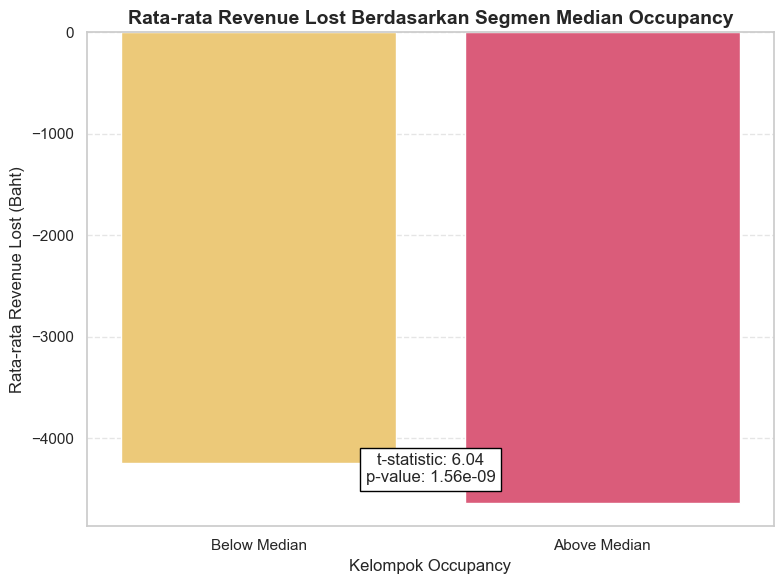

In [4603]:
# Data
labels = ['Below Median', 'Above Median']
revenue_lost = [-4245.58, -4638.05]
colors = ['#FFD166', '#EF476F'] 
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=revenue_lost, palette=colors)

# Tambahkan nilai t-statistic dan p-value di atas plot
plt.text(0.5, min(revenue_lost) + 200, f't-statistic: 6.04\np-value: 1.56e-09', 
         ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

# Label & title
plt.title('Rata-rata Revenue Lost Berdasarkan Segmen Median Occupancy', fontsize=14, fontweight='bold')
plt.ylabel('Rata-rata Revenue Lost (Baht)')
plt.xlabel('Kelompok Occupancy')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Interpretasi : 

* Karena p-value sangat kecil (jauh < 0.05), maka kita menolak H0.
    * Artinya, terdapat perbedaan yang signifikan secara statistik antara kedua kelompok harga.
    * Rata-rata revenue lost untuk listing dengan harga di bawah median (56.54%) memang lebih tinggi daripada yang di atas median (52.62%).

Listing dengan harga terlalu rendah justru berisiko mengalami pendapatan yang hilang lebih besar.  
Meskipun harganya rendah dan mungkin menarik untuk tamu, underpricing tidak menjamin performa yang optimal dari sisi pendapatan tahunan.

### Save to CSV

In [4629]:
df_filtered.to_csv("airbnb_bangkok_filtered.csv", index=False)

low_price_low_occupancy_long_stay.to_csv("segmen1_low_price_low_occupancy.csv", index=False)
high_occupancy_low_price.to_csv("segmen2_low_price_high_occupancy.csv", index=False)
high_price_high_occupancy.to_csv("segmen3_high_price_high_occupancy.csv", index=False)

low_price_low_occupancy_long_stay['segment'] = 'Low Price - Low Occupancy'
high_occupancy_low_price['segment'] = 'Low Price - High Occupancy'
high_price_high_occupancy['segment'] = 'High Price - High Occupancy'

combined_df = pd.concat([
    low_price_low_occupancy_long_stay,
    high_occupancy_low_price,
    high_price_high_occupancy
], ignore_index=True)

combined_df.to_csv("airbnb_bangkok_segments.csv", index=False)

summary_data = {
    'segment': ['Low Price - Low Occupancy', 'Low Price - High Occupancy', 'High Price - High Occupancy'],
    'avg_potential_lost_%': [93.80, 77.14, 11.42],
    'avg_roi_%': [77.31, 14.77, 76.14],
    'avg_revenue_lost_thb': [None, None, 139206.57],
    'avg_opportunity_gain_thb': [None, None, 151978.09],
    'segment_distribution_%': [5.9, 11.0, 83.1]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv("airbnb_summary_segment.csv", index=False)

summary_by_neighbourhood.to_csv("summary_segment1.csv", index=False)
summary_segment2.to_csv("summary_segment2.csv", index=False)
revenue_lost_df.to_csv("revenue_lost_segment3.csv", index=False)
opportunity_gain_df.to_csv("opportunity_gain_segment3.csv", index=False)
segment_percentages.to_csv('segment_percentages_for_tableau.csv', index=False)


# Misal: data yang dipakai bikin map sebelumnya
df_low_price_low_occupancy_map = low_price_low_occupancy_long_stay[['latitude', 'longitude', 'price', 'occupancy_potential']].copy()
df_low_price_low_occupancy_map['segment'] = 'Low Price - Low Occupancy'

df_cheap_high_demand_map = cheap_high_demand[['latitude', 'longitude', 'price', 'occupancy_potential']].copy()
df_cheap_high_demand_map['segment'] = 'Low Price - High Occupancy'

df_high_price_high_occupancy_map = high_price_high_occupancy[['latitude', 'longitude', 'price', 'occupancy_potential']].copy()
df_high_price_high_occupancy_map['segment'] = 'High Price - High Occupancy'

df_map_all_segments = pd.concat([
    df_low_price_low_occupancy_map,
    df_cheap_high_demand_map,
    df_high_price_high_occupancy_map
], ignore_index=True)

df_map_all_segments.to_csv("airbnb_map_all_segments.csv", index=False)


# Buat dataframe ringkasan
roi_lost_summary = pd.DataFrame({
    'Segment': [
        'Low Price - Low Occupancy',
        'Low Price - High Occupancy',
        'High Price - High Occupancy'
    ],
    'Avg_ROI_Percent': [
        average_roi_relative,
        average_roi_percent,
        avg_roi  
    ],
    'Avg_Potential_Lost_Percent': [
        average_potential_lost_percentage,
        average_potential_lost_percent,
        avg_revenue_lost_percent 
    ]
})

roi_lost_summary.to_csv('roi_lost_summary.csv', index=False)

# Tambahkan kolom 'segment' untuk masing-masing dataframe
summary_by_neighbourhood['segment'] = 'Low Price - Low Occupancy'
summary_segment2['segment'] = 'Low Price - High Occupancy'
revenue_lost_df['segment'] = 'High Price - High Occupancy' 

summary1 = summary_by_neighbourhood[['neighbourhood', 'ave_price', 'avg_occupancy_potential', 'segment']]
summary2 = summary_segment2[['neighbourhood', 'avg_price', 'avg_occ_potential', 'segment']]
summary3 = revenue_lost_df[['neighbourhood', 'average_price', 'average_occupancy']]
summary3['segment'] = 'High Price - High Occupancy'

# Sesuaikan nama kolom agar seragam
summary1 = summary_by_neighbourhood[['neighbourhood', 'ave_price', 'avg_occupancy_potential', 'segment']].copy()
summary1.rename(columns={
    'ave_price': 'average_price',
    'avg_occupancy_potential': 'average_occupancy'
}, inplace=True)
summary2 = summary_segment2[['neighbourhood', 'avg_price', 'avg_occ_potential', 'segment']].copy()
summary2.rename(columns={
    'avg_price': 'average_price',
    'avg_occ_potential': 'average_occupancy'
}, inplace=True)
summary3 = revenue_lost_df[['neighbourhood', 'average_price', 'average_occupancy']].copy()
summary3.rename(columns={
    'average_price': 'average_price',
    'average_occupancy': 'average_occupancy'
}, inplace=True)
summary3['segment'] = 'High Price - High Occupancy'

neighbourhood_analysis_df = pd.concat([summary1, summary2, summary3], ignore_index=True)
neighbourhood_analysis_df.to_csv('neighbourhood_analysis.csv', index=False)



## 6. Kesimpulan

Berikut kesimpulan utama dan rekomendasi yang bisa langsung diambil untuk *improvement* strategis Airbnb di Bangkok, terutama dari sudut pandang business analyst/consultant:

🔍 Kesimpulan Utama (Insight Berdasarkan Data)  
**Segmen 1** — `Low Price & Low Occupancy (5.9%)`
1. Potential Lost sangat tinggi (rata-rata 93.80%) meskipun ROI relatif tinggi (77.31%).
2. Properti ini cenderung menetapkan harga terlalu murah namun tidak menarik cukup banyak tamu, berpotensi karena lokasi kurang strategis, masa inap minimum terlalu panjang, atau kurangnya fasilitas.

**Segmen 2** — `Low Price & High Occupancy (11.0%)`
1. Occupancy bagus tetapi ROI rendah (14.77%) dan potential lost tetap tinggi (77.14%).
2. Menunjukkan bahwa harga terlalu murah, membuat pemilik kehilangan potensi revenue meski listing laris.

**Segmen 3** — `High Price & High Occupancy (83.1%)`
1. Segmen dominan dengan ROI tinggi (76.14%) dan opportunity gain besar (THB 151,978.09).
2. Listing di segmen ini menunjukkan bahwa harga tinggi tetap kompetitif bila didukung oleh lokasi, fasilitas, dan reputasi yang baik.

**Hipotesis Terbukti** — `Tolak H0`
1. Listing di bawah harga median memang mengalami revenue lost lebih besar.
2. Artinya, strategi underpricing tidak otomatis menguntungkan dan malah bisa merugikan host.

## 7. Rekomendasi

✅ Rekomendasi Strategis Airbnb Bangkok  

1. **Edukasi Host tentang Penetapan Harga Optimal**
    * Airbnb harus mendorong host untuk tidak hanya berfokus pada harga murah.
    * Perlu disediakan fitur simulasi "Revenue Optimizer" yang bisa memperkirakan potential lost jika harga terlalu rendah.

2. **Kurasi & Pembinaan untuk Segmen Low Price – Low Occupancy**
    * Banyak properti di segmen ini tidak efisien secara finansial. Airbnb bisa:
    * Menawarkan workshop pricing strategy,
    * Memberi notifikasi untuk menyesuaikan minimum nights atau memperbaiki listing quality (foto, deskripsi, fasilitas).

3. **Naikkan Harga pada Listing dengan Occupancy Tinggi & Harga Rendah**
    * Segmen 2 sebaiknya menaikkan harga secara bertahap (price testing) agar ROI meningkat.
    * Airbnb dapat menyarankan harga ideal berdasarkan performa listing sejenis di area tersebut.

4. **Fokus Promosi & Dukungan pada Segmen 3**
    * Listing dengan harga tinggi dan tetap laris terbukti paling menguntungkan.
    * Airbnb bisa memprioritaskan listing ini untuk tampil di hasil pencarian atau memberi badge “High Value Stay”.

5. **Tampilkan Data ROI & Revenue Lost di Dashboard Host**
    * Host akan lebih sadar nilai finansial jika bisa melihat simulasi potensi pendapatan yang hilang secara real-time.

